**Analisi Drug consumption**

# Analisi Drug Consumption dataset

# Costanti


In [ ]:
TRAINING_PERCENTAGE = 0.66
TESTING_PERCENTAGE = 1 - TRAINING_PERCENTAGE
RANDOM_STATE = 42

Classificare il tipo di consumatore di droga in base ai dati sulla personalità in base al tipo di droga

Il database contiene record per 1885 intervistati.

Dopo la quantificazione, i valori di tutte le feature di input possono essere considerati come valori reali. Inoltre, i partecipanti sono stati interrogati sul loro uso di 18 droghe legali e illegali (alcol, anfetamine, nitrito di amile, benzodiazepine, cannabis, cioccolato, cocaina, caffeina, crack, ecstasy, eroina, ketamina, droghe legali, LSD, metadone, funghi, abuso di nicotina e sostanze volatili e un farmaco fittizio (Semeron) che è stato introdotto per identificare i pretendenti in eccesso. Per ogni farmaco devono selezionare una delle risposte: non ha mai usato il farmaco, l'ha usato più di dieci anni fa o nell'ultimo decennio, anno, mese, settimana o giorno.

Il database contiene 18 problemi di classificazione. Ognuna delle variabili etichetta indipendenti contiene sette classi: "Mai usata", "Usata oltre un decennio fa", "Usata nell'ultimo decennio", "Usata nell'ultimo anno", "Usata nell'ultimo mese", "Usata nell'ultima settimana", e "Usato nell'ultimo giorno".

L'obiettivo è classificare il consumo di ogni droga in modo binario: "Alta predisposione" o "Bassa predisposizione".



# Descrizione degli attributi




## Input
1. ID è il numero di record nel database originale. Non può essere correlato al partecipante. Può essere utilizzato solo come riferimento.

2. L'età (reale) è l'età del partecipante e ha uno dei valori

3. Sesso (reale) è il sesso del partecipante

4. Dottorato livello di educazione di ogni partecipante

5. Paese (reale) è il paese di residenza attuale del partecipante e ha uno dei valori

6. Etnia (reale) è l'etnia del partecipante e ha uno dei valori

7. Nscore (Real) è NEO-FFI-R Neuroticism.

8. Escore (Real) è NEO-FFI-R Extraversion.

9. Oscore (Real) è NEO-FFI-R Openness to experience.

10. Ascore (Real) è NEO-FFI-R Piacevolezza.

11. Cscore (Real) è NEO-FFI-R Coscienziosità.

12. Impulsivo (reale) è l'impulsività misurata da BIS-11.

13. SS (reale) è la visione delle sensazioni misurata da ImpSS.


## Output

*Per tutte le droghe i consumi sono rappresentati da questo valore:
 CLO mai usata, CL1 usata 10 anni fa, CL2, usata negli ultimi 10 anni, CL3  usata nell'ultimo anno, CL4 usata nell'ultimo mese, CL5 usata nell'ultima settimana e CL6 usata ieri.*

 ** Abbiamo deciso di classificare in modo binario ragggruppando da CL0 a CL4 e da CL5 a CL6, in modo da formare le classi: dipendenza e non dipendenza **


14. L'alcol è la classe di consumo di alcol.

15. Amphet è la classe di consumo di anfetamine.

16. L'amile è la classe di consumo di nitrito di amile.

17. Benzos è la classe di consumo di benzodiazepine.

18. Caff è la classe di consumo di caffeina.

19. La cannabis è una classe di consumo di cannabis.

20. Choc è la classe di consumo di cioccolato.

21. La coca è una classe di consumo di cocaina.

22. Crack è la classe di consumo di crack.

23. L'ecstasy è una classe di consumo di ecstasy.

24. L'eroina è una classe di consumo di eroina.

25. La ketamina è una classe di consumo di ketamina.

26. Legalh è una classe di consumo di sostanze stupefacenti legali.

27. LSD è la classe di consumo di alcol.

28. Meth è la classe di consumo di metadone.

29. I funghi sono una classe di consumo di funghi magici.

30. La nicotina è una classe di consumo di nicotina.

31. Semer è una classe di consumo fittizio di droga Semeron.

32. VSA è la classe di consumo di abuso di sostanze volatili.

In [ ]:
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

!pip uninstall scikit-learn -y
!pip install -U scikit-learn
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip
!pip install -U imbalanced-learn


/bin/bash: line 1: {sys.executable}: command not found
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 57.9 MB/s eta 0:00:00
     \ 22.6 MB 29.6 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 36.7 MB/s eta 0:

#Import

In [ ]:
import sys
import pandas as pd
from typing import List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#metriche, ricerca iperparametri
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report          ##mai usato
from sklearn.metrics import recall_score
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import export_graphviz
import graphviz

#SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline   #combinare più passaggi di elaborazione dei dati in una sequenza

#cross validazione
from sklearn.model_selection import cross_validate

#modelli di classificazione
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import requests
import ydata_profiling as pp
from google.colab import drive

#Inizializzazione

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
drive.mount('/content/drive')

pathDrive="drive/MyDrive/drug_consumption/drug_consumption.csv";

dataset = pd.read_csv(pathDrive, sep=',', names=["ID", "Età", "Genere", "Istruzione", "Paese", "Etnia","Nscore","Escore","Oscore","Ascore","Cscore","Impulsività","SS","Alcool","Anfetamina","Emyl","Benzos","Caffeina","Cannabis","Cioccolata","Cocaina","Crack","Ecstasy","Eroina","Ketamina","Droge legali","LSD","Metadone","Funghi","Nicotina","Semer","VSA"])
# Save the target column and drop the target
droghe=["Alcool","Anfetamina","Emyl","Benzos","Caffeina","Cannabis","Cioccolata","Cocaina","Crack","Ecstasy","Eroina","Ketamina","Droge legali","LSD","Metadone","Funghi","Nicotina","Semer","VSA"];
target = dataset[droghe]
#dataset.drop(droghe,axis=1, inplace=True)


# Convertiamo il problema di classificazione multiclasse in un problema binario
for d in droghe:
  target[d] = (target[d]=='CL6') | (target[d]=='CL5');

dataset[droghe]=target
dataset


Mounted at /content/drive


<ipython-input-4-f7d2d358c37f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target[d] = (target[d]=='CL6') | (target[d]=='CL5');


,ID,Età,Genere,Istruzione,Paese,Etnia,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Eroina,Ketamina,Droge legali,LSD,Metadone,Funghi,Nicotina,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,False,False,False,False,False,False,False,False,False,False
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,False,False,False,False,False,False,False,False,False,False
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,False,False,False,False,False,False,False,False,False,False
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,False,False,False,False,False,False,False,False,False,False
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,False,False,False,False,False,False,False,False,False,True
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,False,False,False,False,True,False,False,True,False,False
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,False,False,False,False,False,False,False,True,False,False
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,False,False,False,False,False,False,False,False,False,False


# Data Analysis



Vado a eliminare la colonna relativa all'*ID*

In [ ]:
dataset.drop("ID",axis=1, inplace=True)

Inoltre riteniamo non necessario fare un **aggregation** dei dati in quanto le feature sono ben distinte tra loro

Viene analizzato il dataset utilizzando il profile report messo a disposizione da Pandas

In [ ]:
pp.ProfileReport(dataset)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

Il dataset analizzato presenta diverse classificazioni in base alla sostanza analizzata.

In particolare per quanto riguarda la dipendeza (almeno una volta a settimana)
-  Alcol circa il 68% delle persone
- Caffeina ovviamente molto alta 88%
- Cannabis 34%
- Cioccolata 80%
- Nicotina 40%
- Semer 0%

Per quanto riguarda le altre droghe i valori sono ampiamneti sbilanciati verso una classificazione negativa (NON dipendenza)


Abbiamo una certa collerazione tra SS e Impulsività 0.629.



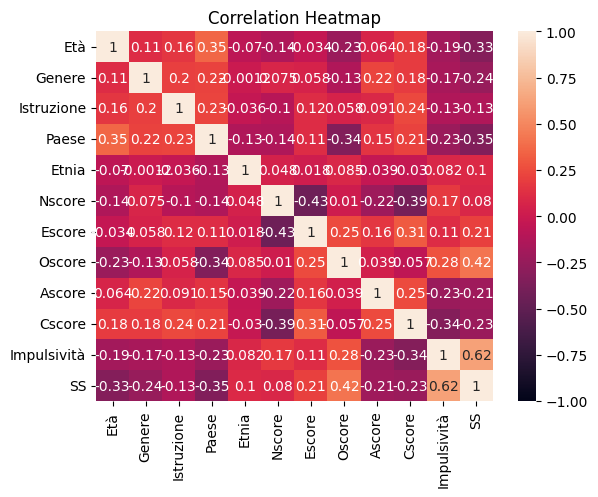

In [ ]:
datasetNoOutput=dataset.copy()
datasetNoOutput.drop(droghe,axis=1, inplace=True)
heatmap = sns.heatmap(datasetNoOutput.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap')
plt.show()


Inoltre, abbiamo notato che anche l’attributo Etnia non fornisce delle informazioni in più poiché il 92% dei pazienti appartiene alla medesima. Quindi lo abbiamo eliminato

In [ ]:
dataset.drop("Etnia",axis=1, inplace=True)
datasetNoOutput.drop("Etnia",axis=1, inplace=True)


Guardiamo la distribuzione dei nostri dati per ogni sostanza, in questo modo possiamo fare delle considerazioni per ogni sostanza.

1264


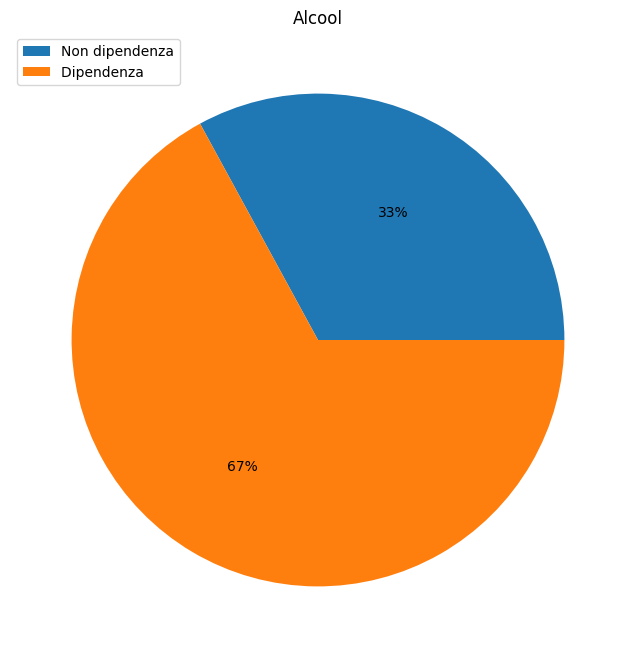

163


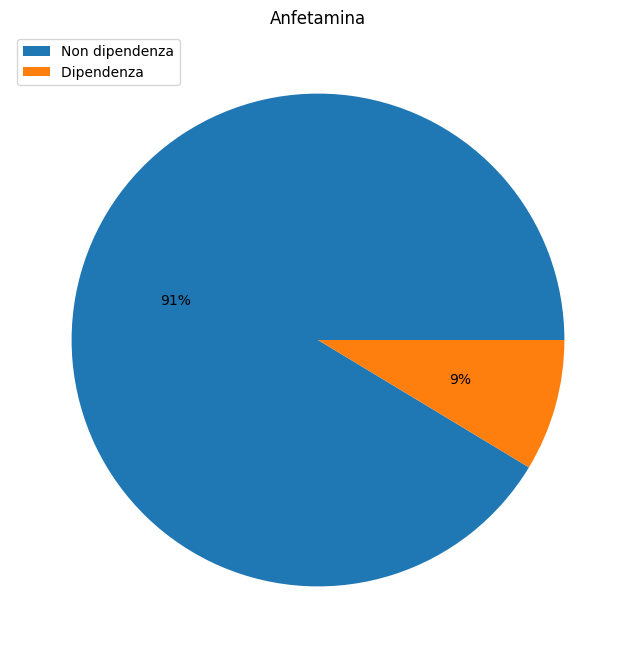

17


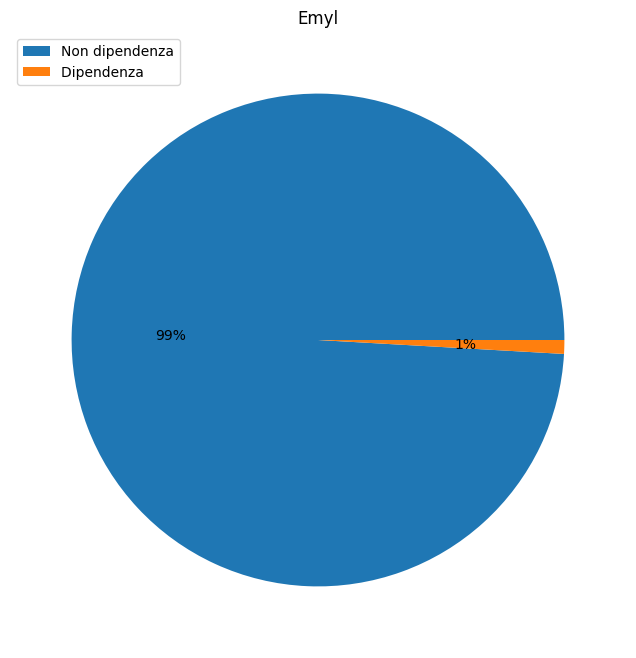

179


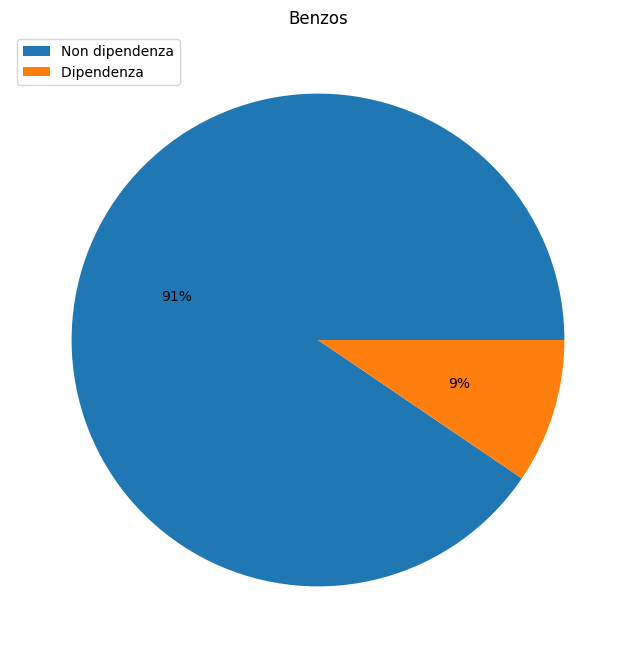

1658


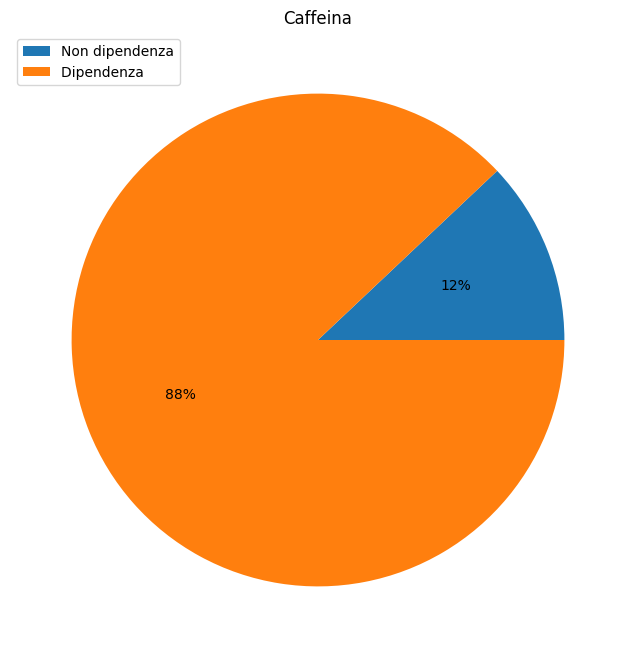

648


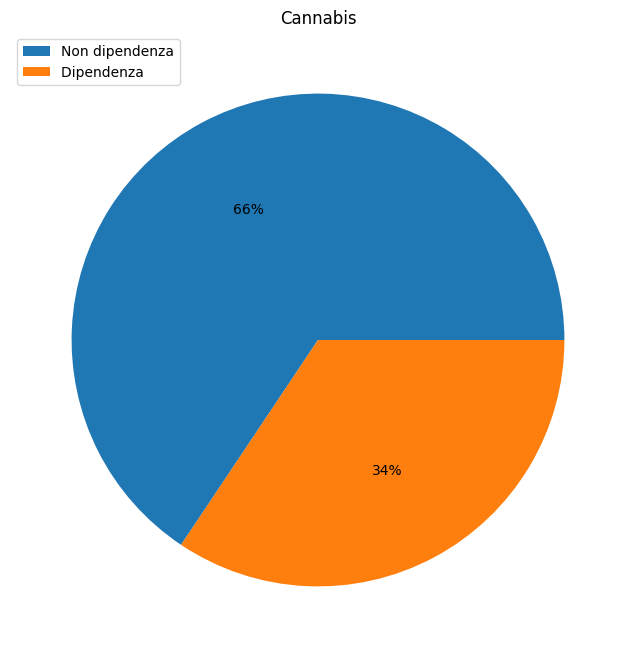

1490


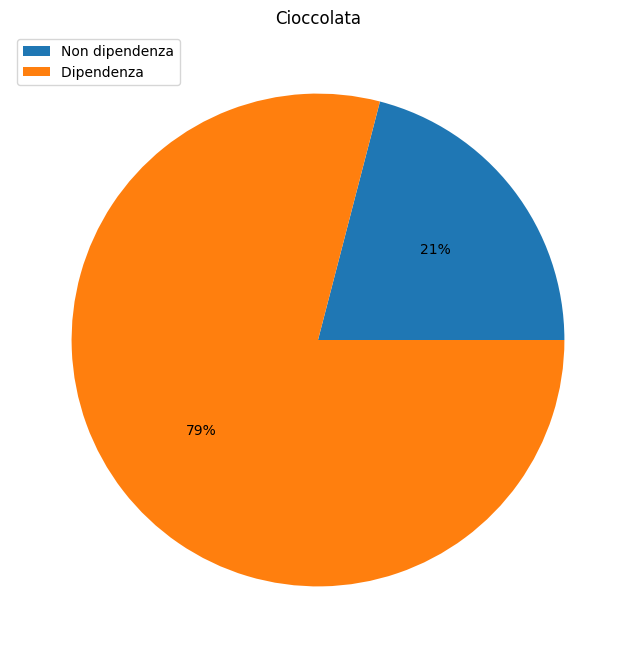

60


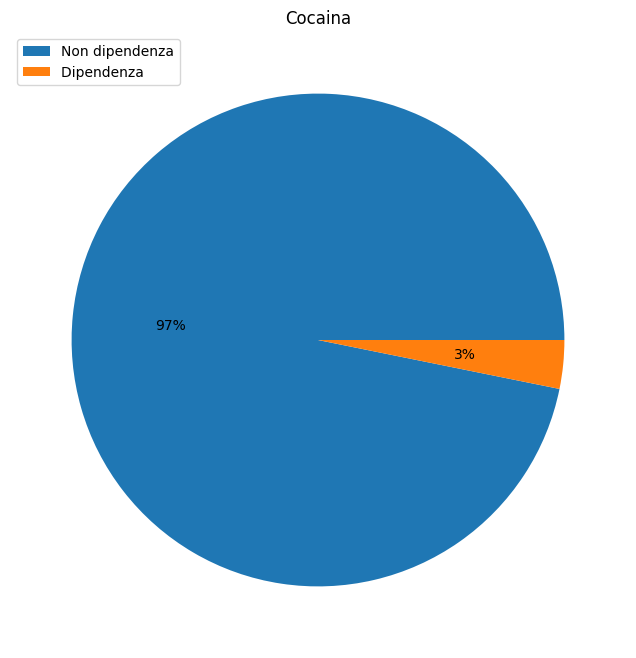

11


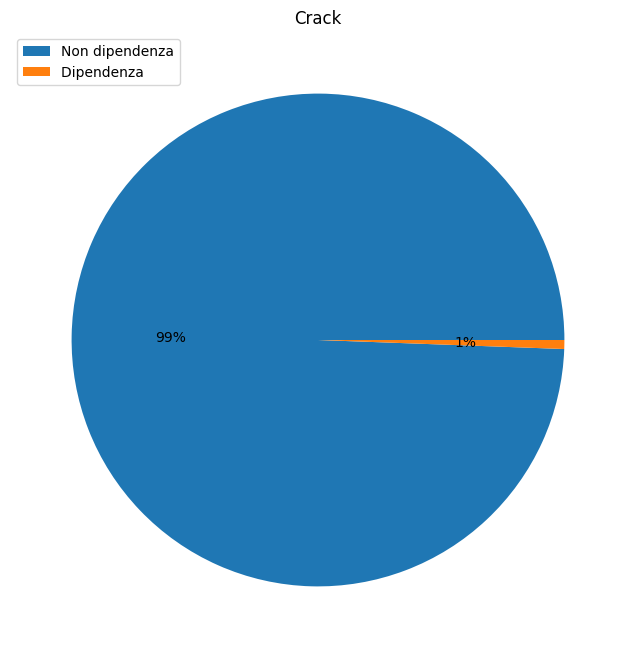

84


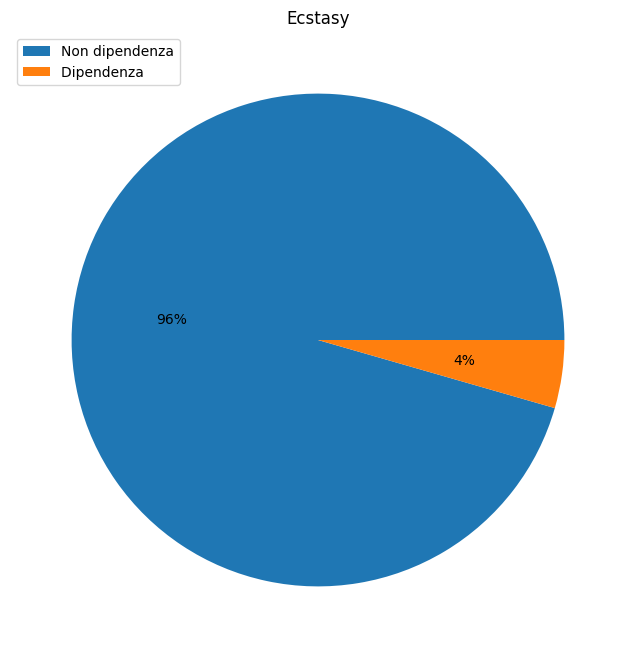

29


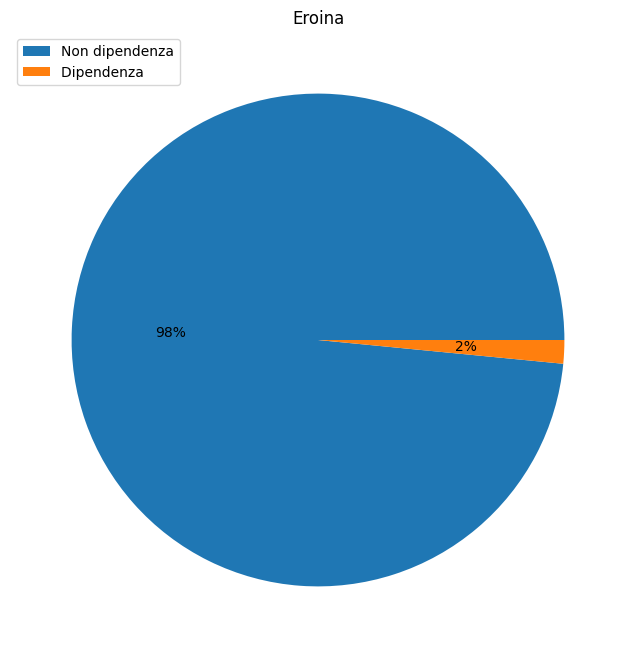

37


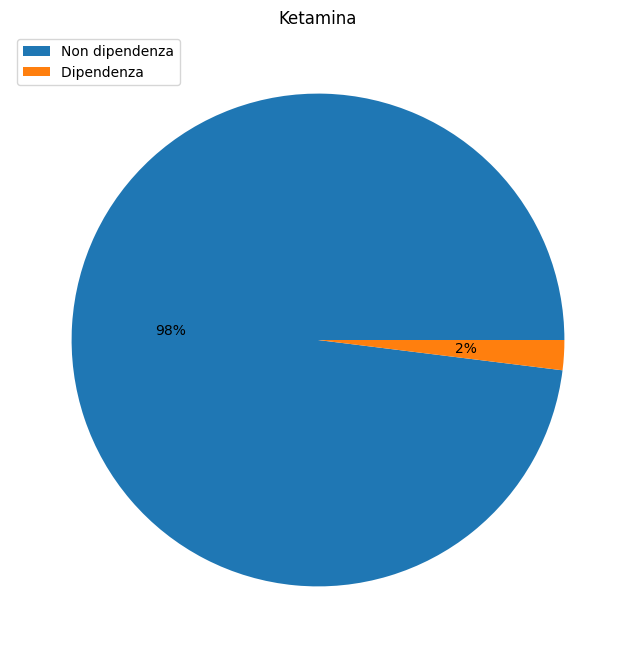

131


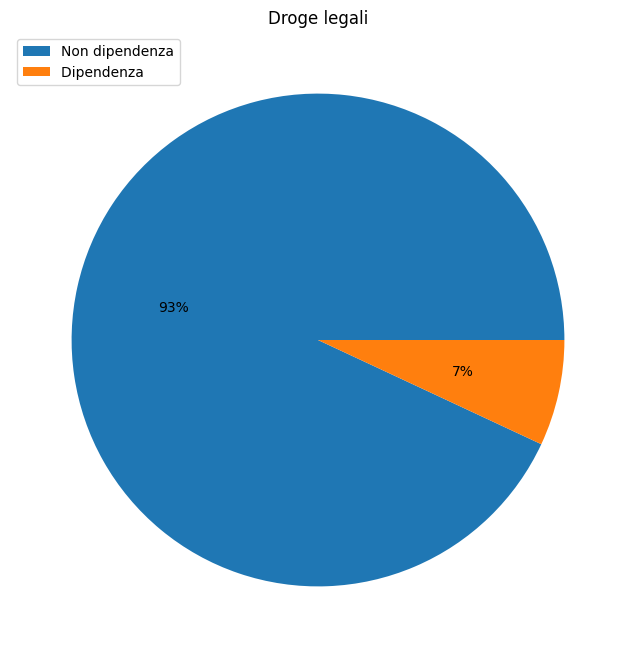

69


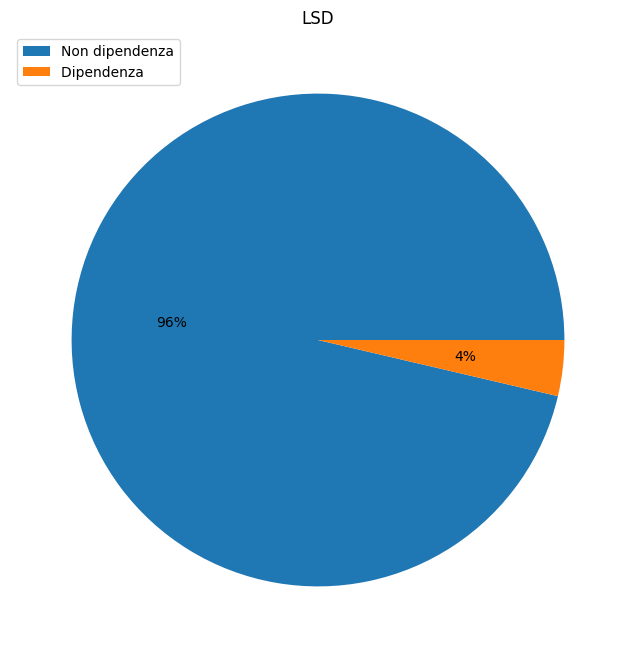

121


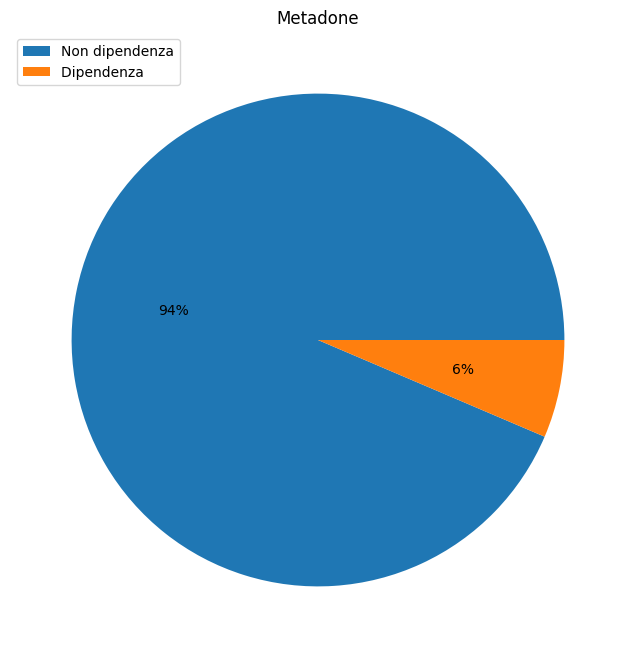

44


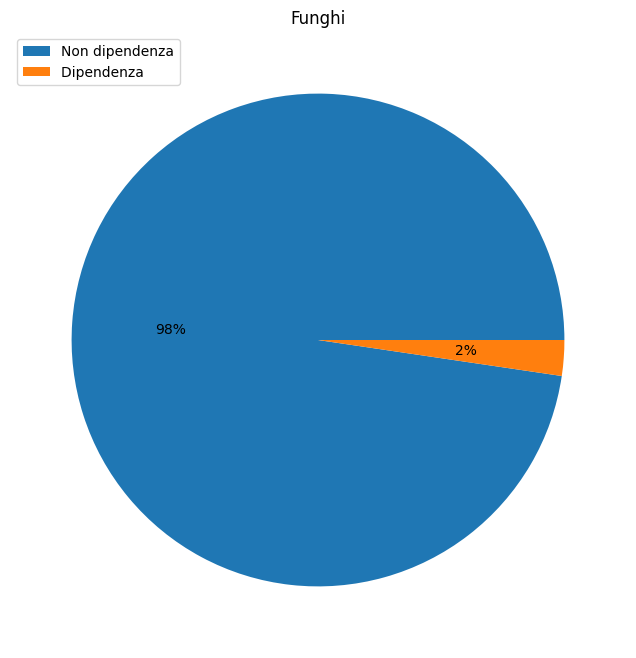

767


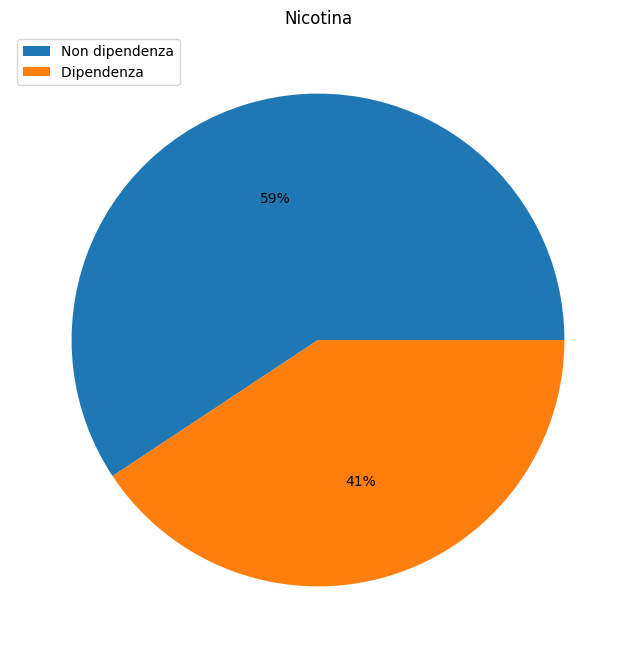

0


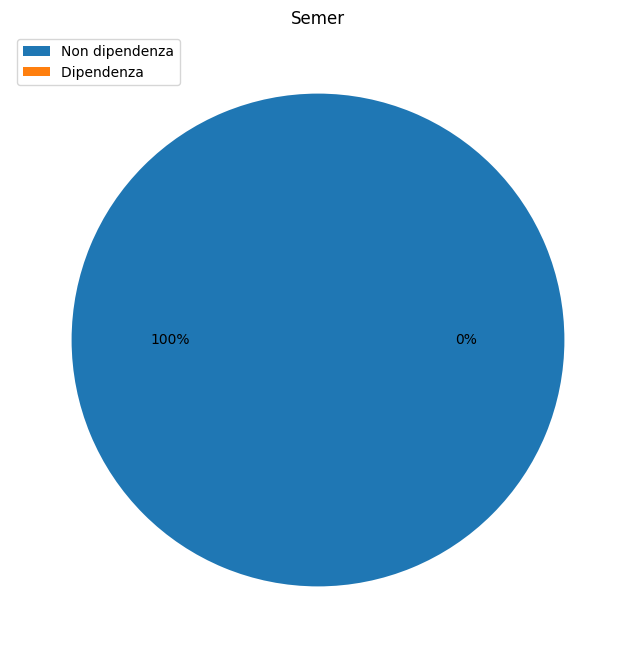

21


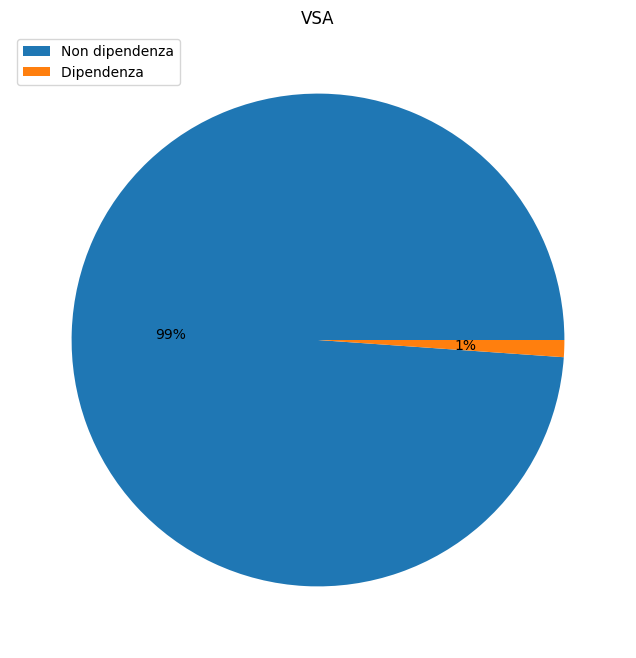

In [ ]:

for d in droghe:
  total = len(dataset)
  yes_class = len(dataset.loc[dataset[d]==1])
  print(yes_class)

  x = np.array([total-yes_class, yes_class])
  labels = ["Non dipendenza", "Dipendenza "]
  plt.figure(figsize=(12, 8))
  plt.title(d)
  plt.pie(x, autopct='%1.0f%%')
  plt.legend(labels, loc = 'upper left')
  plt.show()


##**Verifico i missing values e li vado a sostituire con il valore mediano**

In [ ]:
def count_missing(ds: pd.DataFrame):
    return ds.shape[0] - ds.count()

def array_to_dataframe(arr: np.ndarray, columns: List[str]):
    return pd.DataFrame(data=arr, columns=columns)

count_missing(dataset)

median_imp_arr = SimpleImputer(strategy="median").fit_transform(dataset)
dataset = array_to_dataframe(arr=median_imp_arr, columns=dataset.columns)

dataset

count_missing(dataset)


Età             0
Genere          0
Istruzione      0
Paese           0
Nscore          0
Escore          0
Oscore          0
Ascore          0
Cscore          0
Impulsività     0
SS              0
Alcool          0
Anfetamina      0
Emyl            0
Benzos          0
Caffeina        0
Cannabis        0
Cioccolata      0
Cocaina         0
Crack           0
Ecstasy         0
Eroina          0
Ketamina        0
Droge legali    0
LSD             0
Metadone        0
Funghi          0
Nicotina        0
Semer           0
VSA             0
dtype: int64

##**Cerco di trovare gli outlier**

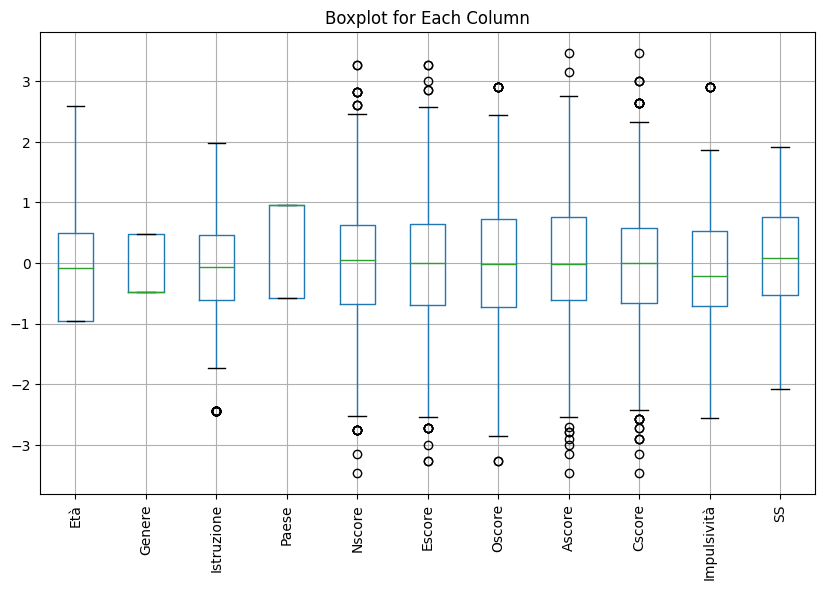

In [ ]:
datasetNoOutput=dataset.copy()
datasetNoOutput.drop(droghe,axis=1, inplace=True)
datasetNoOutput.boxplot(figsize=(10, 6))
plt.xticks(rotation=90)
plt.title("Boxplot for Each Column")
plt.show()

Elimino gli outlier cioè quelli che stanno fuori dal boxplot

In [ ]:
names=["Età", "Genere", "Istruzione", "Paese","Nscore","Escore","Oscore","Ascore","Cscore","Impulsività","SS"];
for x in names:
  q75,q25=np.percentile(dataset.loc[:,x],[75,25])
  intr_qr=q75-q25
  max=q75+(1.5*intr_qr)
  min=q25-(1.5*intr_qr)

  dataset.loc[dataset[x]<min,x]=np.nan
  dataset.loc[dataset[x]>max,x]=np.nan
  dataset[names].isnull().sum()
  dataset=dataset.dropna(axis=0)


dataset

,Età,Genere,Istruzione,Paese,Nscore,Escore,Oscore,Ascore,Cscore,Impulsività,...,Ecstasy,Eroina,Ketamina,Droge legali,LSD,Metadone,Funghi,Nicotina,Semer,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.07854,-0.48246,1.98437,0.96082,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.49788,-0.48246,-0.05921,0.96082,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.95197,0.48246,1.16365,0.96082,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.49788,0.48246,1.98437,0.96082,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1882,-0.07854,0.48246,0.45468,-0.57009,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1883,-0.95197,0.48246,-0.61113,-0.57009,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Verifico che non ci sono più outlier

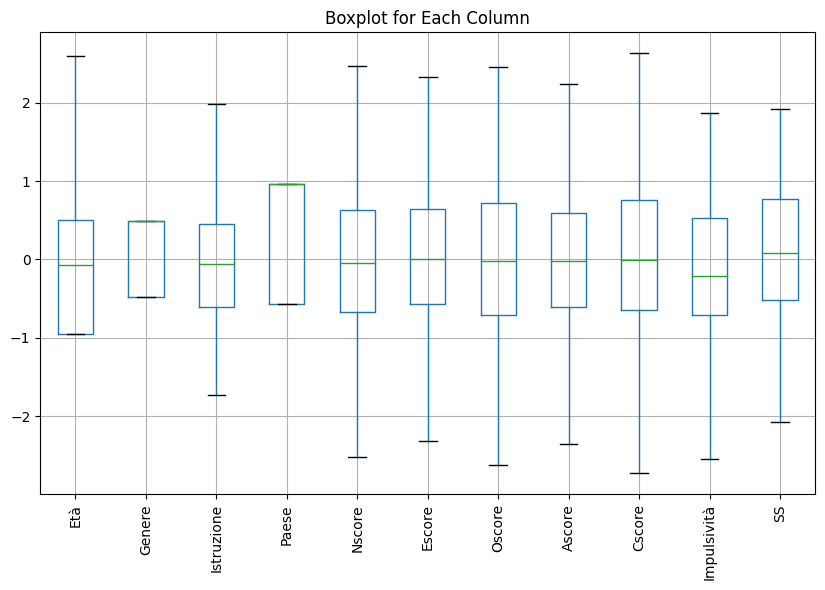

In [ ]:
datasetNoOutput=dataset.copy()
datasetNoOutput.drop(droghe,axis=1, inplace=True)
datasetNoOutput.boxplot(figsize=(10, 6))
plt.xticks(rotation=90)
plt.title("Boxplot for Each Column")
plt.show()

## Creazione del dataset di training e di testing

Creiamo i dataset per il training e il test in base alla droga scelta e facciamo una standardizzazione delle features utilizzando StandardScaler di scikit-learn

In [ ]:
drogaBassaDipendenza = "Benzos";
drogaDipendenzaBilanciata = "Cannabis";

dataset_enc_bd = pd.DataFrame(data = dataset, columns=["Età", "Genere", "Istruzione", "Paese","Nscore","Escore","Oscore","Ascore","Cscore","Impulsività","SS"]);
target_enc_bd=dataset[drogaBassaDipendenza];
dataset_enc_bal = pd.DataFrame(data = dataset, columns=["Età", "Genere", "Istruzione", "Paese","Nscore","Escore","Oscore","Ascore","Cscore","Impulsività","SS"]);
target_enc_bal=dataset[drogaDipendenzaBilanciata];


def scaled_train_test_data(dataset, target):
  X_train, X_test, Y_train, Y_test =  train_test_split(dataset, target,  test_size=TESTING_PERCENTAGE, random_state=RANDOM_STATE)
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)
  return (X_train, X_test, Y_train, Y_test)

(X_train_bd, X_test_bd, Y_train_bd, Y_test_bd)= scaled_train_test_data(dataset_enc_bd, target_enc_bd)       #X input, Y output(target)
(X_train_bal, X_test_bal, Y_train_bal, Y_test_bal) = scaled_train_test_data(dataset_enc_bal, target_enc_bal)


# Albero di decisione

Funzione per generare il miglior decision tree

In [ ]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,4,5,6,7],
    'min_samples_leaf': [10,15,20,25,30,35,40,45,50],  #num minimo istanze per nodo foglia
}

dtc = DecisionTreeClassifier(class_weight='balanced')
grid_search_cv = GridSearchCV(
      estimator=dtc,
      param_grid=params,
      cv=cv,
      verbose=1,
      scoring="f1_weighted",    #f1_weighted è una metrica di valutazione che calcola la media pesata dell'F1-score per ogni classe, dove il peso è determinato dalla frequenza di ogni classe nel dataset. L'F1-score è una metrica che combina la precisione e il richiamo (recall) di un modello di classificazione ed è utile quando le classi sono sbilanciate.
      return_train_score=True,
      n_jobs=-1,
      error_score='raise'
  )

##Analisi bassa dipendenza


Fitting 30 folds for each of 90 candidates, totalling 2700 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 10}
Best score: 0.778366250783789
Accuracy:  0.7102177554438861
Recall: 0.6851851851851852


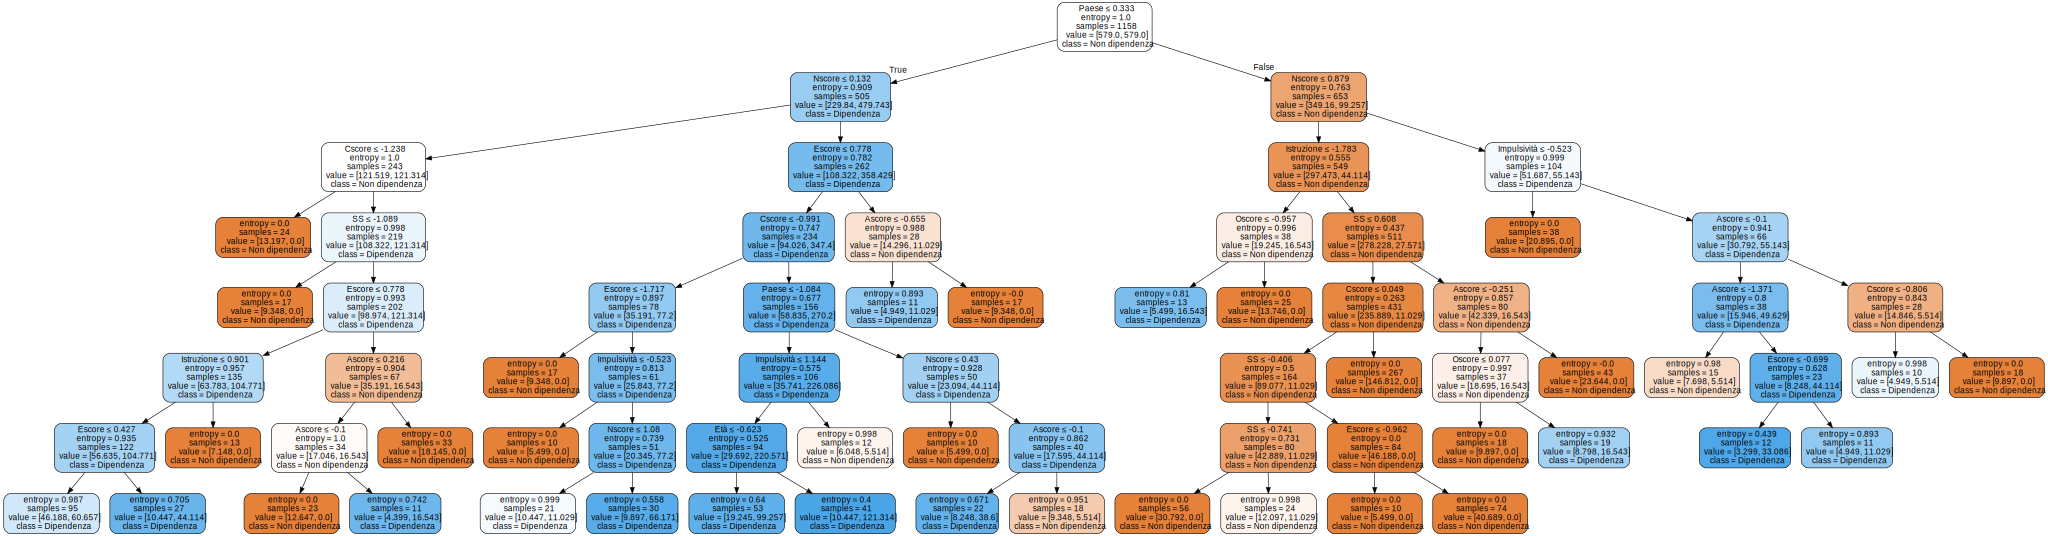

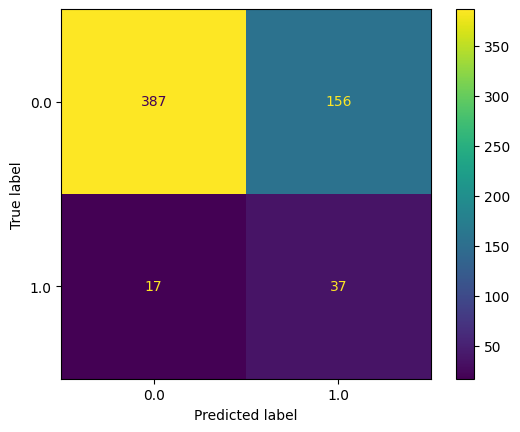

In [ ]:
grid_search_cv.fit(X_train_bd, Y_train_bd)

best_params = grid_search_cv.best_params_

print("Best parameters:",grid_search_cv.best_params_)
print("Best score:", grid_search_cv.best_score_)
best_dtc = grid_search_cv.best_estimator_

Y_pred = grid_search_cv.predict(X_test_bd)

cm=confusion_matrix(Y_test_bd, Y_pred)

print("Accuracy: ", accuracy_score(Y_test_bd, Y_pred))

# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

recall = recall_score(Y_test_bd, Y_pred)
print("Recall:", recall)


# Visualize Decision Tree
dot_data = export_graphviz(
      decision_tree=best_dtc,
      out_file="decision_tree.dot",
      feature_names=names,
      class_names = ['Non dipendenza','Dipendenza'],
      filled=True,
      rounded=True,
      special_characters=True,)

# Read the dot graph and display image
with open("decision_tree.dot") as f:
      dot_graph = f.read()

display(graphviz.Source(dot_graph))


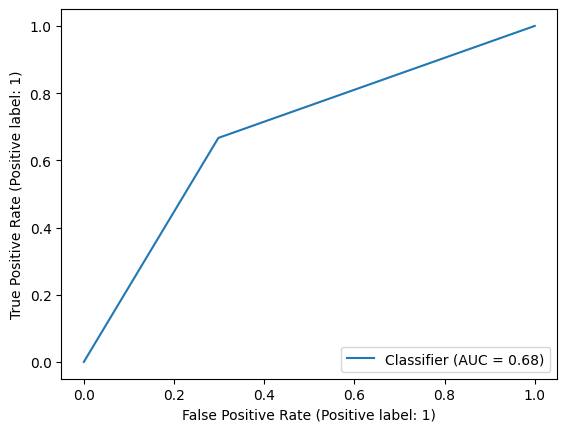

In [ ]:
RocCurveDisplay.from_predictions(Y_test_bd, Y_pred)
plt.show()

Accuracy:  0.6984924623115578
Recall: 0.5370370370370371


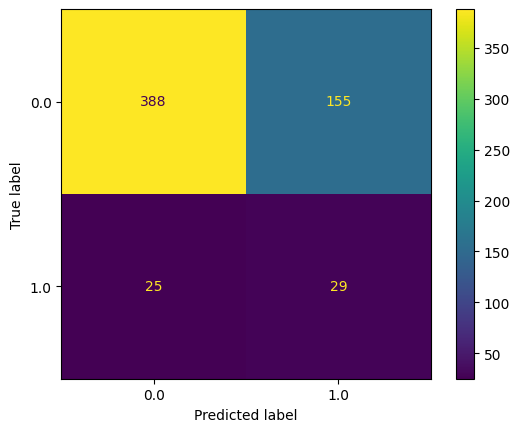

In [ ]:
# euristica per i pesi dato lo sbilanciamento del dataset, aumentiamo pesi istanze positive che sono le minori

tree = DecisionTreeClassifier(**best_params,class_weight = "balanced", random_state=42)
dizionario = cross_validate(tree, X_train_bd, Y_train_bd,cv=cv, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bd)

cm=confusion_matrix(Y_test_bd, Y_pred)
print("Accuracy: ", accuracy_score(Y_test_bd, Y_pred))

# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

recall = recall_score(Y_test_bd, Y_pred)

print("Recall:", recall)

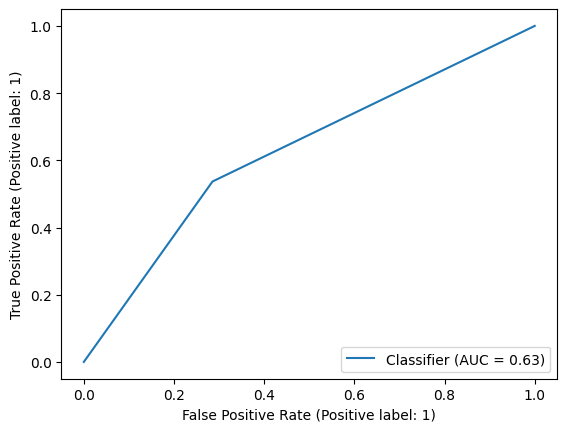

In [ ]:
RocCurveDisplay.from_predictions(Y_test_bd, Y_pred)
plt.show()

Accuracy:  0.7269681742043551


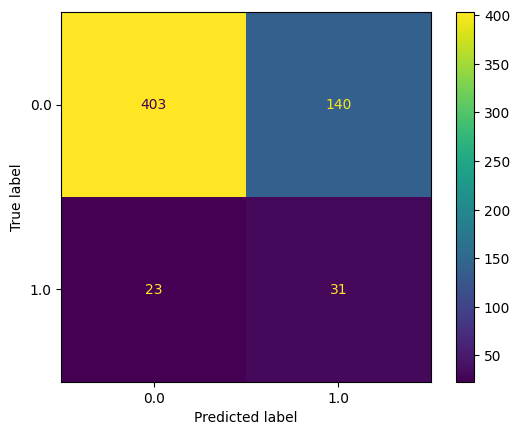

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline   #combinare più passaggi di elaborazione dei dati in una sequenza
import matplotlib.pyplot as plt

tree = DecisionTreeClassifier(**best_params,class_weight = "balanced", random_state=42)
over = SMOTE(sampling_strategy=0.3, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
steps = [('o', over), ('u', under), ('model', tree)]
pipeline = Pipeline(steps=steps)

dizionario = cross_validate(pipeline, X_train_bd, Y_train_bd, cv=cv, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bd)

print("Accuracy: ", accuracy_score(Y_test_bd, Y_pred))
cm=confusion_matrix(Y_test_bd, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

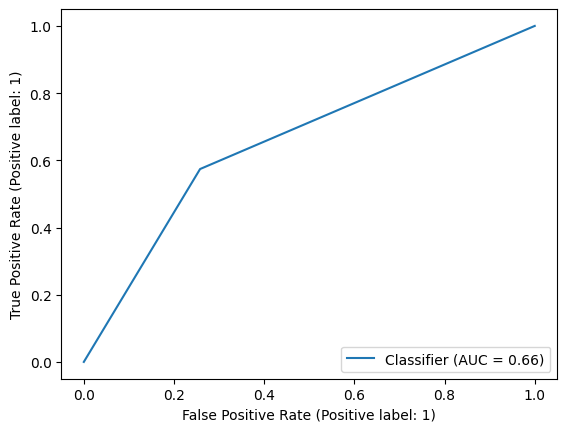

In [ ]:
RocCurveDisplay.from_predictions(Y_test_bd, Y_pred)
plt.show()

##Analisi dipendenza bilanciata

Fitting 30 folds for each of 90 candidates, totalling 2700 fits
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 15}
Best score: 0.7415915265030542
Accuracy:  0.7403685092127303
Recall: 0.7135678391959799


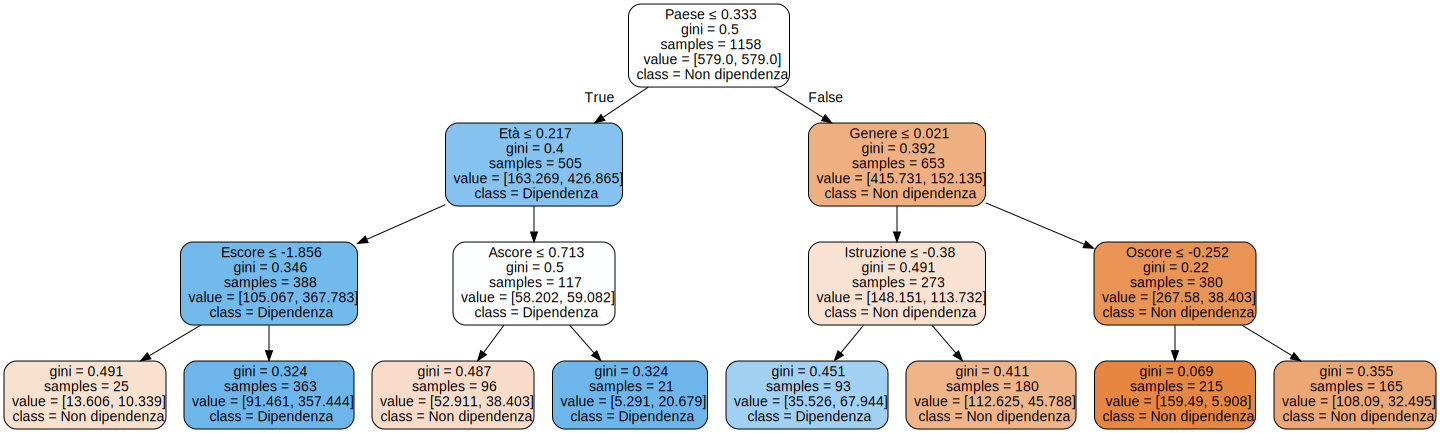

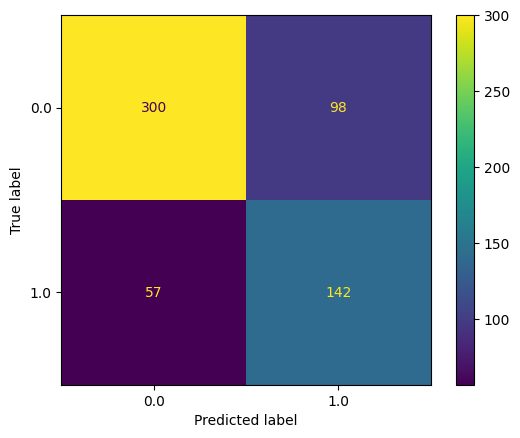

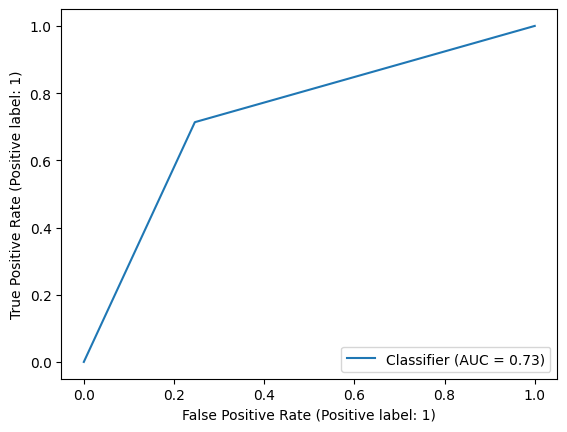

In [ ]:
grid_search_cv.fit(X_train_bal, Y_train_bal)

print("Best parameters:",grid_search_cv.best_params_)
print("Best score:", grid_search_cv.best_score_)
best_dtc = grid_search_cv.best_estimator_

best_params = grid_search_cv.best_params_
Y_pred = grid_search_cv.predict(X_test_bal)        #predizione sui valori in input di test

cm=confusion_matrix(Y_test_bal, Y_pred)            #confronta valori predetti con quelli veri

# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

print("Accuracy: ", accuracy_score(Y_test_bal, Y_pred))
recall = recall_score(Y_test_bal, Y_pred)
print("Recall:", recall)

# Visualize Decision Tree
dot_data = export_graphviz(
      decision_tree=best_dtc,
      out_file="decision_tree.dot",
      feature_names=names,
      class_names = ['Non dipendenza','Dipendenza'],
      filled=True,
      rounded=True,
      special_characters=True,)

# Read the dot graph and display image
with open("decision_tree.dot") as f:
      dot_graph = f.read()

display(graphviz.Source(dot_graph))

RocCurveDisplay.from_predictions(Y_test_bal, Y_pred)
plt.show()

***Cerchiamo diverse soluzioni per le droghe che presentano dipendenza bilanciata (test fatti con Cannabis)***

Accuracy:  0.7236180904522613
Recall: 0.8391959798994975


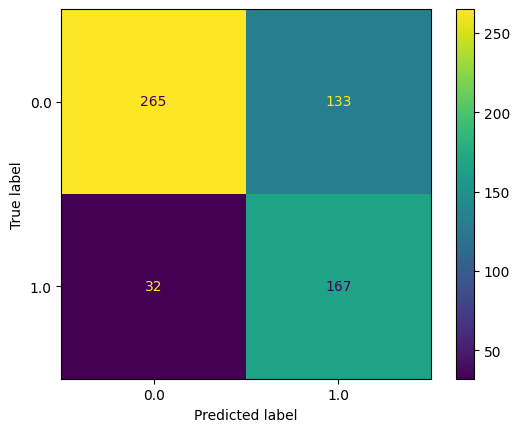

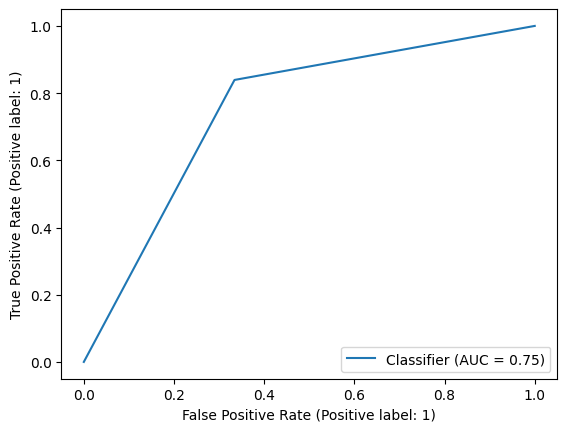

In [ ]:
# euristica per i pesi dato lo sbilanciamento del dataset, aumentiamo pesi istanze positive che sono le minori
tree = DecisionTreeClassifier(**best_params,class_weight='balanced', random_state=42)
dizionario = cross_validate(tree, X_train_bal, Y_train_bal,cv=cv, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bal)

cm=confusion_matrix(Y_test_bal, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()
print("Accuracy: ", accuracy_score(Y_test_bal, Y_pred))
recall = recall_score(Y_test_bal, Y_pred)
print("Recall:", recall)

RocCurveDisplay.from_predictions(Y_test_bal, Y_pred)
plt.show()


SMOTE è una tecnica utilizzata per bilanciare classi sbilanciate generando campioni sintetici della classe minoritaria. Per utilizzare correttamente SMOTE, è importante scegliere un rapporto adeguato che sia sufficientemente grande da generare abbastanza campioni sintetici, ma non troppo grande da introdurre un eccessivo overfitting.

Accuracy:  0.7403685092127303


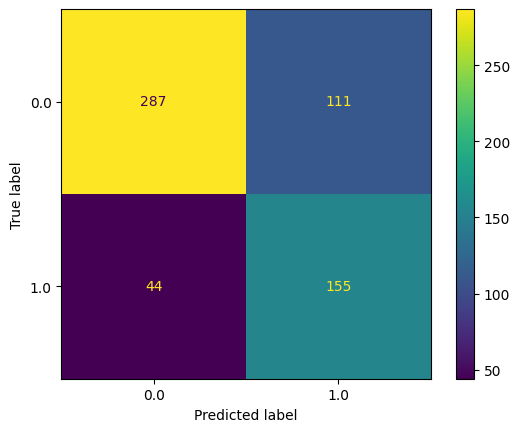

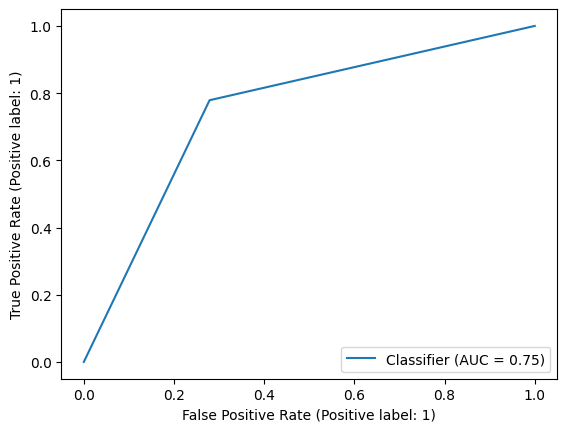

In [ ]:
tree = DecisionTreeClassifier(**best_params,class_weight='balanced', random_state=42)
over = SMOTE(sampling_strategy='auto',random_state=42)
under = RandomUnderSampler(sampling_strategy='auto',random_state=42)
steps = [('o', over), ('u', under), ('model', tree)]
pipeline = Pipeline(steps=steps)

dizionario = cross_validate(pipeline, X_train_bal, Y_train_bal, cv=cv, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bal)

print("Accuracy: ", accuracy_score(Y_test_bal, Y_pred))
cm=confusion_matrix(Y_test_bal, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()


RocCurveDisplay.from_predictions(Y_test_bal, Y_pred)
plt.show()

#Reti neurali

MLPClassifier implementa un algoritmo percettrone multistrato (MLP) che esegue il training utilizzando Backpropagation .
Utilizziamo la grid_search_cv per trovare gli iperparametri ideali per il modello, a cui passiamo alcuni parametri tra cui scegliere

In [ ]:
params = {                                    ##trovare i parametri ideali. fit molto lento!
      "activation": ["logistic", "relu","tanh"],        #funzione di attivazione utilizzata dai neuroni
      "alpha" : [0.0001, 0.001],                 #parametro di regolarizzazione che serve per limitare potenziali situazioni di overfitting
      "max_iter":[500, 600],                     #numero di epoche
      #"n_iter_no_change": [20, 30],              #numero massimo di epoche consecutive eseguibili senza ottenere un significativo abbattimento dell’errore di validazione.
      "solver":["lbfgs"],             #scelto perchè ottimo per db piccoli e molto più veloce di adam
}
neural_network = MLPClassifier(random_state=42)

grid_search_cv = GridSearchCV(
      estimator=neural_network,
      param_grid=params,
      cv=cv,
      verbose=1,
      scoring="f1_weighted",
      return_train_score=True,
      n_jobs=-1,
      error_score='raise'
  )



##Analisi bassa dipendenza

Fitting 30 folds for each of 12 candidates, totalling 360 fits
Recall: 0.16666666666666666
Accuracy:  0.8576214405360134


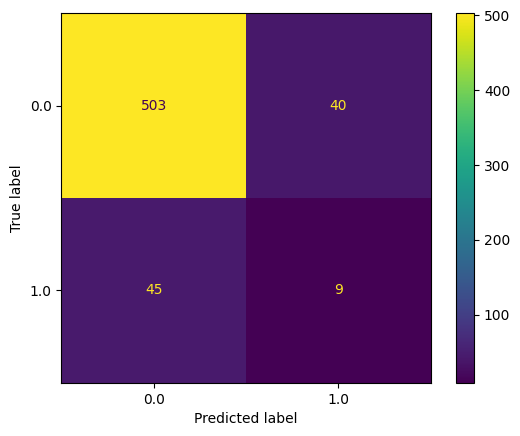

In [ ]:
# Addestra il modello con GridSearchCV
grid_search_cv.fit(X_train_bd, Y_train_bd)

# Trova i migliori parametri e il miglior score
best_params = grid_search_cv.best_params_
best_score = grid_search_cv.best_score_


# Addestra il modello con i migliori parametri trovati
best_neural_network = MLPClassifier(**best_params, random_state=42)
best_neural_network.fit(X_train_bd, Y_train_bd)

# Esegui le previsioni sul test set
Y_pred = best_neural_network.predict(X_test_bd)

# Stampa confusion matrix
cm=confusion_matrix(Y_test_bd, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

print("Recall:", recall_score(Y_test_bd, Y_pred))
print("Accuracy: ", accuracy_score(Y_test_bd, Y_pred))

In [ ]:
print(best_params)

{'activation': 'relu', 'alpha': 0.001, 'max_iter': 300, 'solver': 'lbfgs'}


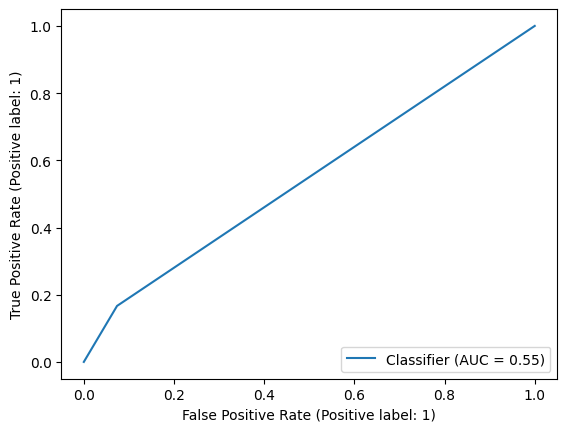

In [ ]:
RocCurveDisplay.from_predictions(Y_test_bd, Y_pred)
plt.show()

Accuracy:  0.8542713567839196


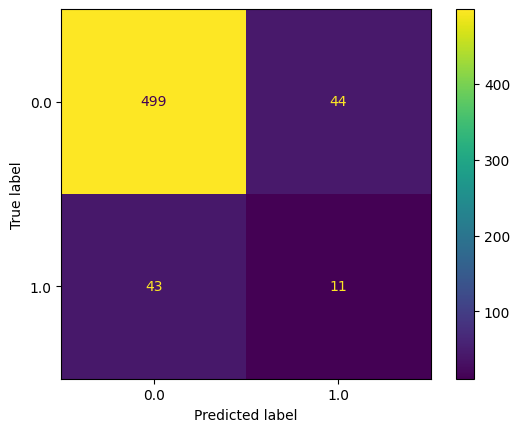

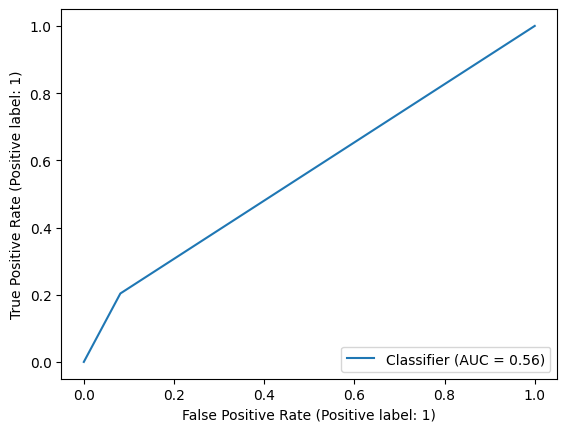

In [ ]:
ann = MLPClassifier(**best_params,random_state=42)
dizionario = cross_validate(ann, X_train_bd, Y_train_bd, cv=cv, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bd)

print("Accuracy: ", accuracy_score(Y_test_bd, Y_pred))

cm=confusion_matrix(Y_test_bd, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

RocCurveDisplay.from_predictions(Y_test_bd, Y_pred)
plt.show()


Accuracy:  0.8190954773869347


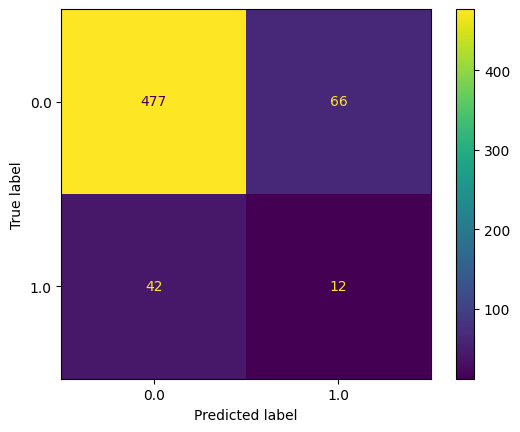

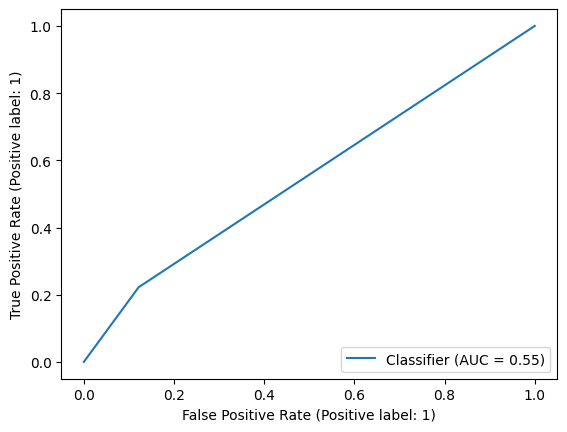

In [ ]:
ann = MLPClassifier(**best_params,random_state=42)
over = SMOTE(sampling_strategy=0.3, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
steps = [('o', over), ('u', under), ('model', ann)]
pipeline = Pipeline(steps=steps)


dizionario = cross_validate(pipeline, X_train_bd, Y_train_bd, cv=5, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bd)

print("Accuracy: ", accuracy_score(Y_test_bd, Y_pred))

cm=confusion_matrix(Y_test_bd, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

RocCurveDisplay.from_predictions(Y_test_bd, Y_pred)
plt.show()


## Analisi dipendenza bilanciata

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Recall: 0.6231155778894473
Accuracy:  0.711892797319933


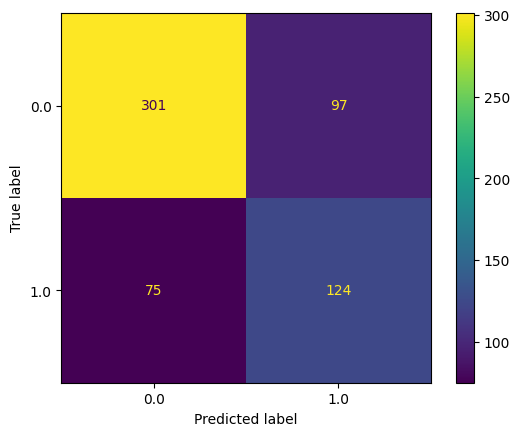

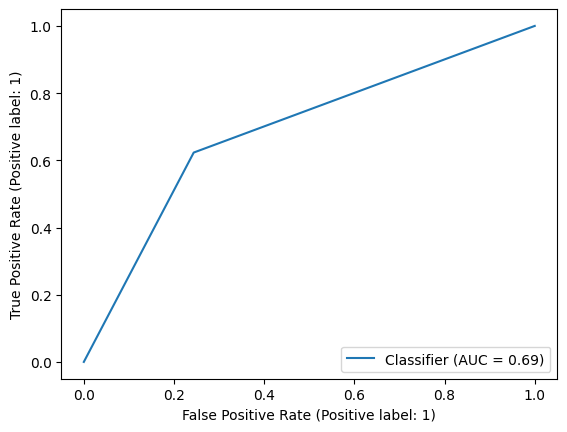

In [ ]:
# Addestra il modello con GridSearchCV
grid_search_cv.fit(X_train_bal, Y_train_bal)

# Trova i migliori parametri e il miglior score
best_params = grid_search_cv.best_params_
best_score = grid_search_cv.best_score_


# Addestra il modello con i migliori parametri trovati
best_neural_network = MLPClassifier(**best_params, random_state=42)
best_neural_network.fit(X_train_bal, Y_train_bal)

# Esegui le previsioni sul test set
Y_pred = best_neural_network.predict(X_test_bal)

# Stampa confusion matrix
cm=confusion_matrix(Y_test_bal, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

print("Recall:", recall_score(Y_test_bal, Y_pred))
print("Accuracy: ", accuracy_score(Y_test_bal, Y_pred))


RocCurveDisplay.from_predictions(Y_test_bal, Y_pred)
plt.show()

Accuracy:  0.7169179229480737


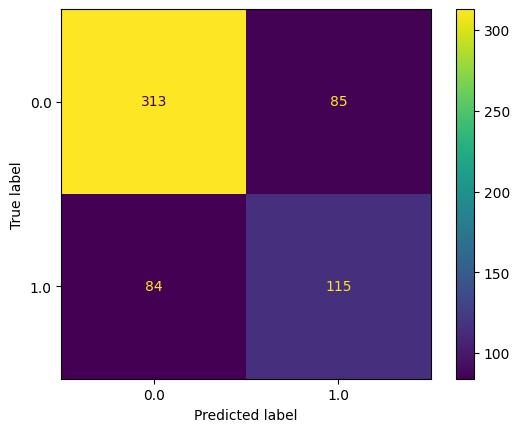

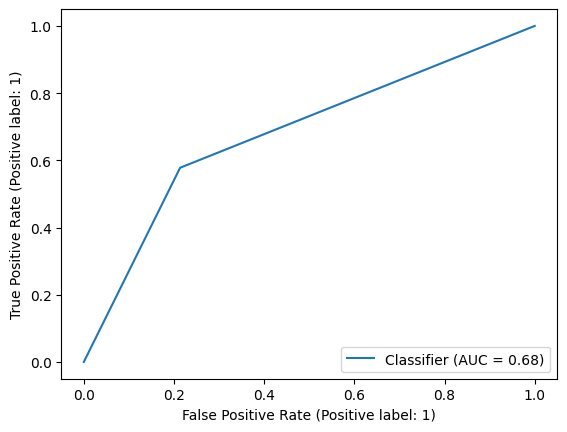

In [ ]:
ann = MLPClassifier(**best_params, random_state=42)

dizionario = cross_validate(ann, X_train_bal, Y_train_bal, cv=cv, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bal)

print("Accuracy: ", accuracy_score(Y_test_bal, Y_pred))

cm=confusion_matrix(Y_test_bal, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

RocCurveDisplay.from_predictions(Y_test_bal, Y_pred)
plt.show()


Accuracy:  0.7269681742043551


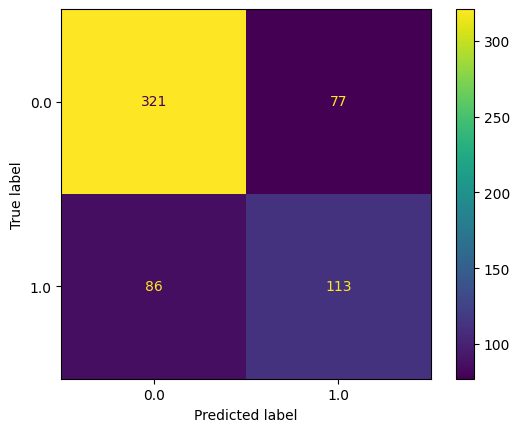

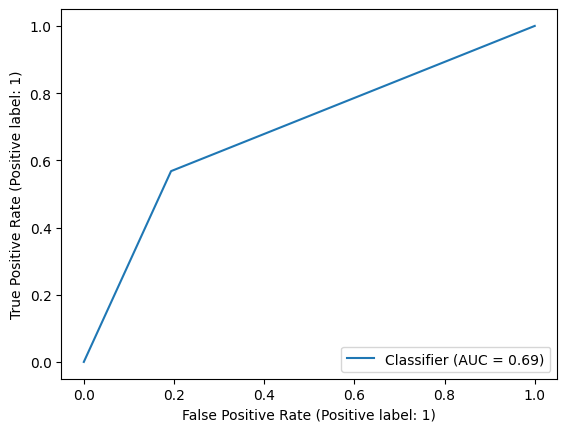

In [ ]:
ann = MLPClassifier(**best_params,random_state=42)
over = SMOTE(sampling_strategy='auto',random_state=42)
under = RandomUnderSampler(sampling_strategy='auto', random_state=42)
steps = [('o', over), ('u', under), ('model', ann)]
pipeline = Pipeline(steps=steps)

dizionario = cross_validate(pipeline, X_train_bal, Y_train_bal, cv=5, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bal)

print("Accuracy: ", accuracy_score(Y_test_bal, Y_pred))

cm=confusion_matrix(Y_test_bal, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

RocCurveDisplay.from_predictions(Y_test_bal, Y_pred)
plt.show()


#Support vector machine

In [ ]:
params = {
      'kernel': ["sigmoid", "linear", "rbf", "poly"],
      'degree': [2, 3, 4],
      'class_weight': ['balanced'],
      'decision_function_shape': ['ovo', 'ovr'],
}

svm = SVC()

grid_search_cv = GridSearchCV(
      estimator=svm,
      param_grid=params,
      cv=5,
      verbose=1,
      scoring="f1_weighted",
      return_train_score=True,
      n_jobs=-1,
      error_score='raise'
  )


## Analisi bassa dipendenza

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Recall: 0.3148148148148148
Accuracy:  0.7906197654941374


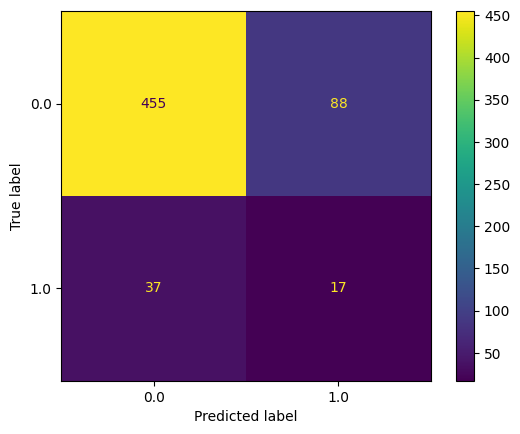

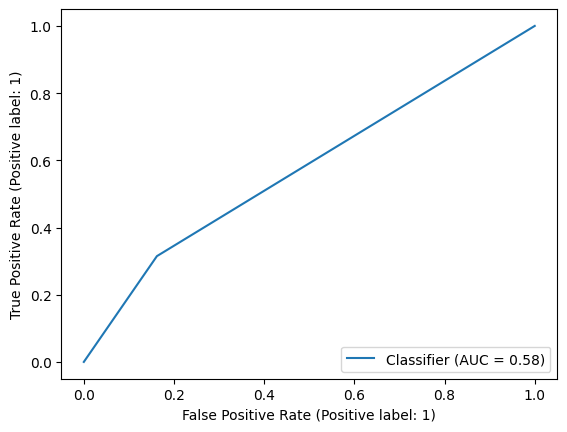

In [ ]:
# Addestra il modello con GridSearchCV
grid_search_cv.fit(X_train_bd, Y_train_bd)

# Trova i migliori parametri e il miglior score
best_params = grid_search_cv.best_params_
best_score = grid_search_cv.best_score_

# Addestra il modello con i migliori parametri trovati
best_svm = SVC(**best_params, random_state=42)
best_svm.fit(X_train_bd, Y_train_bd)

# Esegui le previsioni sul test set
Y_pred = best_svm.predict(X_test_bd)

# Stampa confusion matrix
cm=confusion_matrix(Y_test_bd, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

print("Recall:", recall_score(Y_test_bd, Y_pred))
print("Accuracy: ", accuracy_score(Y_test_bd, Y_pred))


RocCurveDisplay.from_predictions(Y_test_bd, Y_pred)
plt.show()

In [ ]:
print(best_params)

{'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 4, 'kernel': 'poly'}


Accuracy:  0.8006700167504187


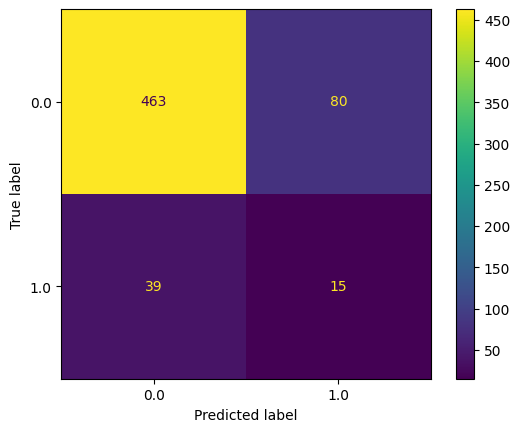

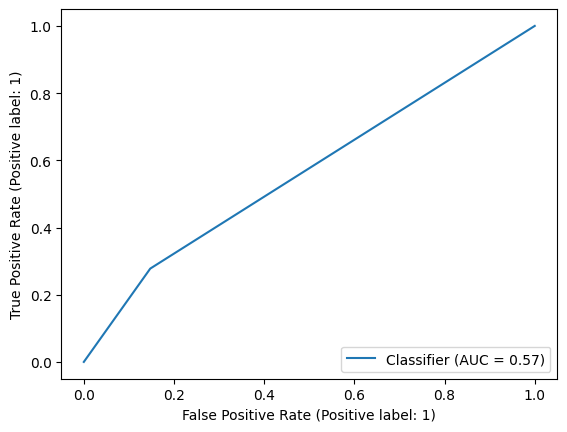

In [ ]:
svm = SVC(**best_params,random_state=42)
dizionario = cross_validate(svm, X_train_bd, Y_train_bd, cv=cv, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bd)

print("Accuracy: ", accuracy_score(Y_test_bd, Y_pred))

cm=confusion_matrix(Y_test_bd, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

RocCurveDisplay.from_predictions(Y_test_bd, Y_pred)
plt.show()


Accuracy:  0.7303182579564489


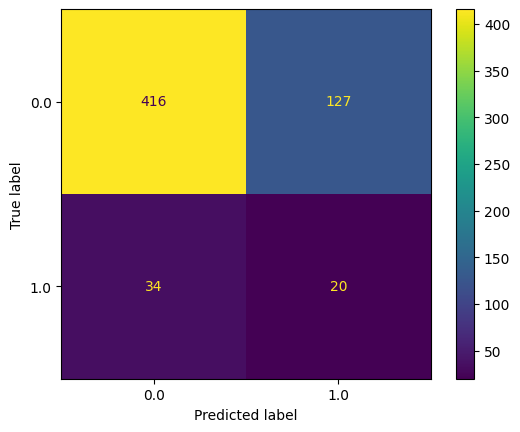

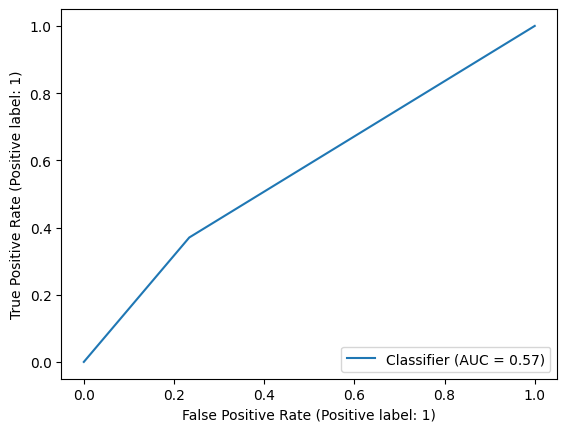

In [ ]:
svm = SVC(**best_params,random_state=42)
over = SMOTE(sampling_strategy=0.3, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
steps = [('o', over), ('u', under), ('model', svm)]
pipeline = Pipeline(steps=steps)


dizionario = cross_validate(pipeline, X_train_bd, Y_train_bd, cv=5, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bd)

print("Accuracy: ", accuracy_score(Y_test_bd, Y_pred))

cm=confusion_matrix(Y_test_bd, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

RocCurveDisplay.from_predictions(Y_test_bd, Y_pred)
plt.show()

## Analisi dipendenza bilanciata

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Recall: 0.8140703517587939
Accuracy:  0.7755443886097152


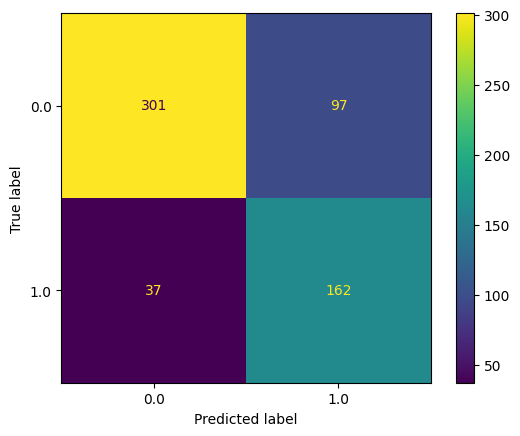

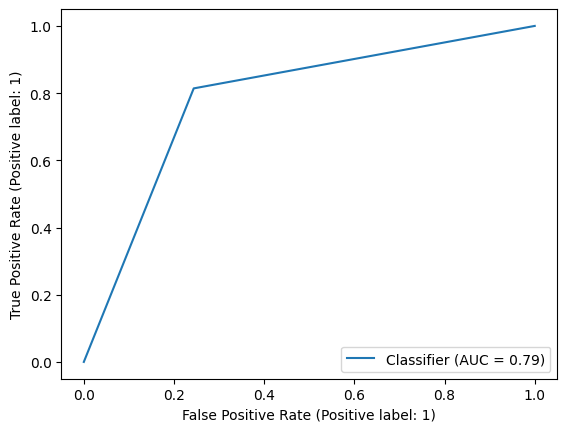

In [ ]:
# Addestra il modello con GridSearchCV
grid_search_cv.fit(X_train_bal, Y_train_bal)

# Trova i migliori parametri e il miglior score
best_params = grid_search_cv.best_params_
best_score = grid_search_cv.best_score_

# Addestra il modello con i migliori parametri trovati
best_svm = SVC(**best_params, random_state=42)
best_svm.fit(X_train_bal, Y_train_bal)

# Esegui le previsioni sul test set
Y_pred = best_svm.predict(X_test_bal)

# Stampa confusion matrix
cm=confusion_matrix(Y_test_bal, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

print("Recall:", recall_score(Y_test_bal, Y_pred))
print("Accuracy: ", accuracy_score(Y_test_bal, Y_pred))


RocCurveDisplay.from_predictions(Y_test_bal, Y_pred)
plt.show()

In [ ]:
best_params

{'class_weight': 'balanced',
 'decision_function_shape': 'ovo',
 'degree': 2,
 'kernel': 'rbf'}

Accuracy:  0.7755443886097152


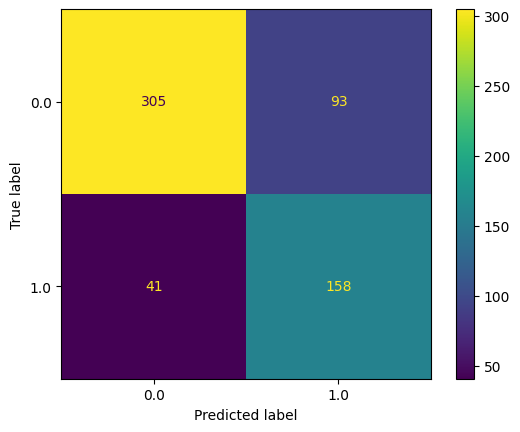

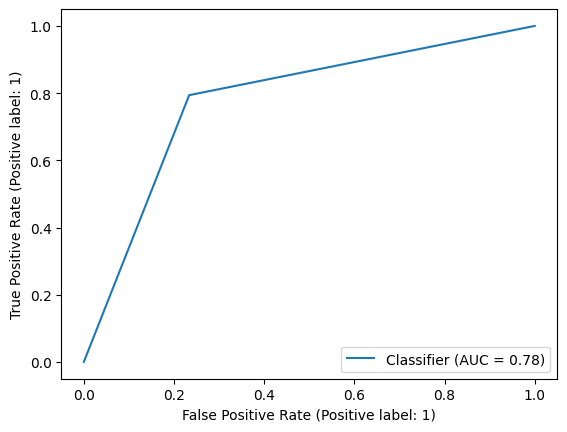

In [ ]:
svm = SVC(**best_params,random_state=42)
dizionario = cross_validate(svm, X_train_bal, Y_train_bal, cv=cv, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bal)

print("Accuracy: ", accuracy_score(Y_test_bal, Y_pred))

cm=confusion_matrix(Y_test_bal, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

RocCurveDisplay.from_predictions(Y_test_bal, Y_pred)
plt.show()

Accuracy:  0.7705192629815746


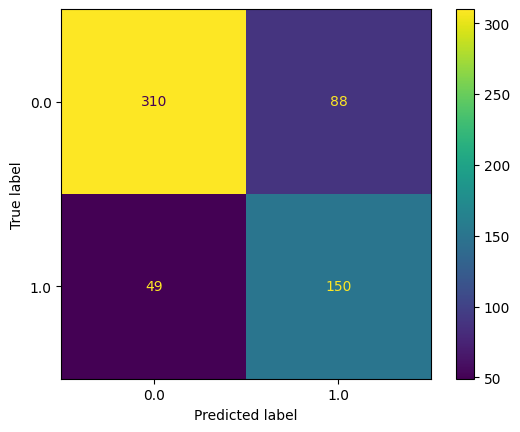

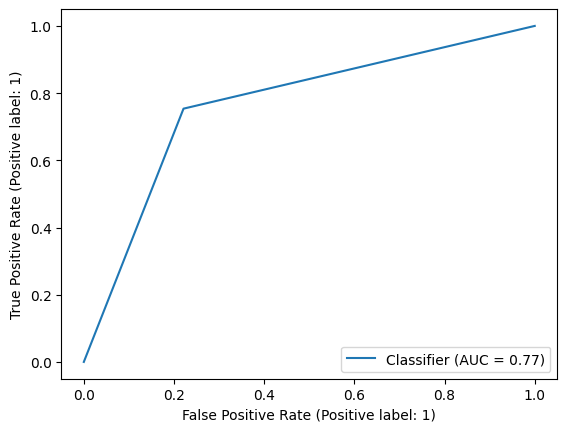

In [ ]:
svm = SVC(**best_params,random_state=42)
over = SMOTE(sampling_strategy='auto', random_state=42)
under = RandomUnderSampler(sampling_strategy='auto', random_state=42)
steps = [('o', over), ('u', under), ('model', svm)]
pipeline = Pipeline(steps=steps)


dizionario = cross_validate(pipeline, X_train_bal, Y_train_bal, cv=5, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bal)

print("Accuracy: ", accuracy_score(Y_test_bal, Y_pred))

cm=confusion_matrix(Y_test_bal, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

RocCurveDisplay.from_predictions(Y_test_bal, Y_pred)
plt.show()

# Random forest Classifier

In [ ]:
# Create the parameter grids
parameter_grid = {
      "n_estimators" : [5,10,100],
      "max_samples" : [50,100, 900],
      #"max_features":['sqrt','log2'],
      #"max_depth":[3,4,5,6,7],
      #'min_samples_leaf': [10,15,20],
      #'criterion': ['gini', 'entropy'],
      "class_weight":['balanced_subsample'],
  }

forest= RandomForestClassifier(random_state=42)

  # Create and fit the GridSearchCV
grid_search_cv = GridSearchCV(
      estimator=forest,
      param_grid=parameter_grid,
      cv=5,
      verbose=1,
      scoring="f1_weighted",
      return_train_score=True,
      n_jobs=-1
)

## Analisi bassa dipendenza

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Recall: 0.5925925925925926
Accuracy:  0.7537688442211056


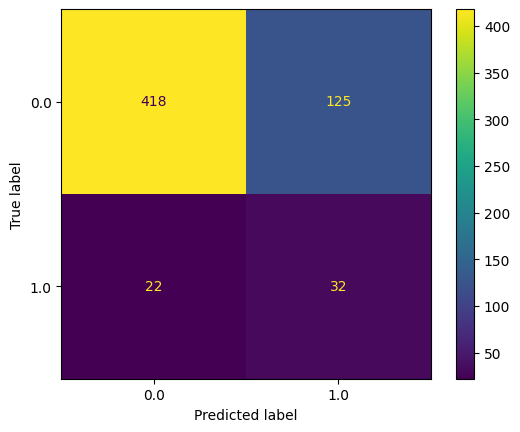

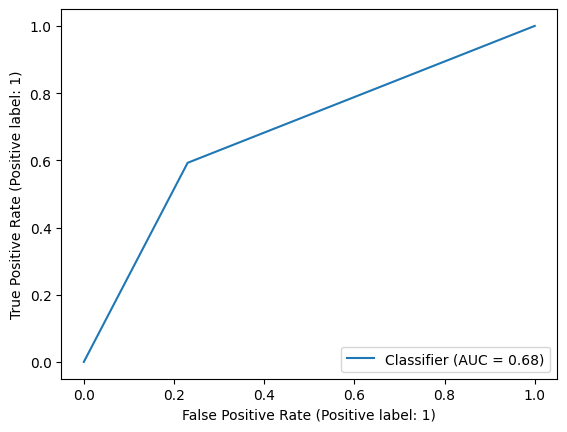

In [ ]:
# Addestra il modello con GridSearchCV
grid_search_cv.fit(X_train_bd, Y_train_bd)

# Trova i migliori parametri e il miglior score
best_params = grid_search_cv.best_params_
best_score = grid_search_cv.best_score_

# Addestra il modello con i migliori parametri trovati
# parametri trovati con la grid search cv ma passati direttametne perchè altrimenti modello troppo lento
best_rf = RandomForestClassifier(**best_params, random_state=42,max_depth=4,min_samples_leaf=10,criterion='gini')
best_rf.fit(X_train_bd, Y_train_bd)

# Esegui le previsioni sul test set
Y_pred = best_rf.predict(X_test_bd)

# Stampa confusion matrix
cm=confusion_matrix(Y_test_bd, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

print("Recall:", recall_score(Y_test_bd, Y_pred))
print("Accuracy: ", accuracy_score(Y_test_bd, Y_pred))


RocCurveDisplay.from_predictions(Y_test_bd, Y_pred)
plt.show()

In [ ]:
print(best_params)

{'class_weight': 'balanced_subsample', 'max_samples': 900, 'n_estimators': 100}


Accuracy:  0.7654941373534339


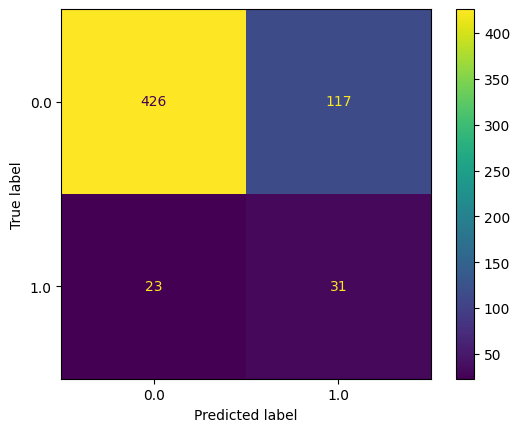

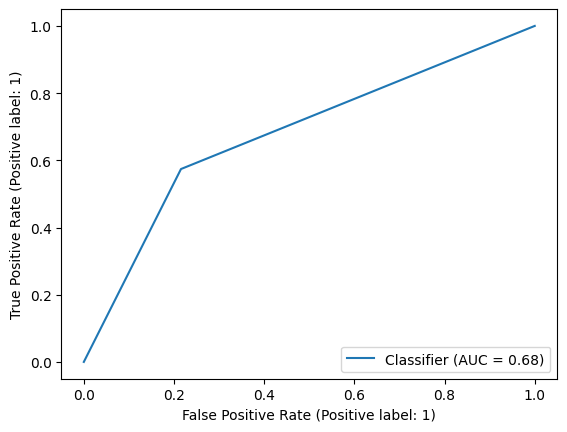

In [ ]:
rf = RandomForestClassifier(**best_params,random_state=42,max_depth=4,min_samples_leaf=10,criterion='gini')

dizionario = cross_validate(rf, X_train_bd, Y_train_bd, cv=cv, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bd)

print("Accuracy: ", accuracy_score(Y_test_bd, Y_pred))

cm=confusion_matrix(Y_test_bd, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

RocCurveDisplay.from_predictions(Y_test_bd, Y_pred)
plt.show()


Accuracy:  0.7386934673366834


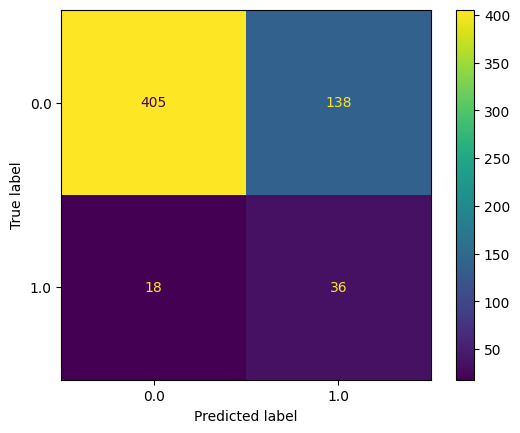

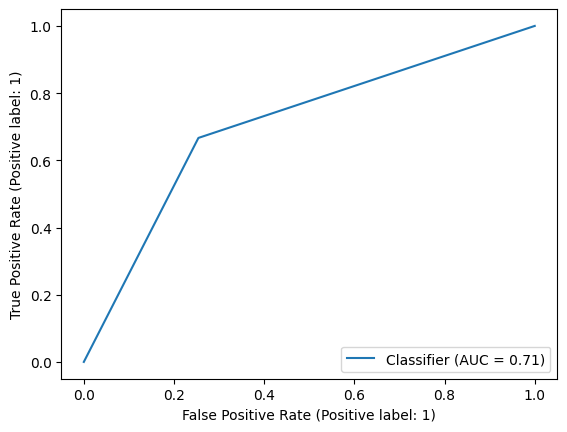

In [ ]:
rf = RandomForestClassifier(**best_params,random_state=42,max_depth=4,min_samples_leaf=10,criterion='gini')
over = SMOTE(sampling_strategy='auto', random_state=42)
under = RandomUnderSampler(sampling_strategy='auto', random_state=42)
steps = [('o', over), ('u', under), ('model', rf)]
pipeline = Pipeline(steps=steps)


dizionario = cross_validate(pipeline, X_train_bd, Y_train_bd, cv=5, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bd)

print("Accuracy: ", accuracy_score(Y_test_bd, Y_pred))

cm=confusion_matrix(Y_test_bd, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

RocCurveDisplay.from_predictions(Y_test_bd, Y_pred)
plt.show()


## Analisi dipendenza bilanciata

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Recall: 0.7487437185929648
Accuracy:  0.7688442211055276


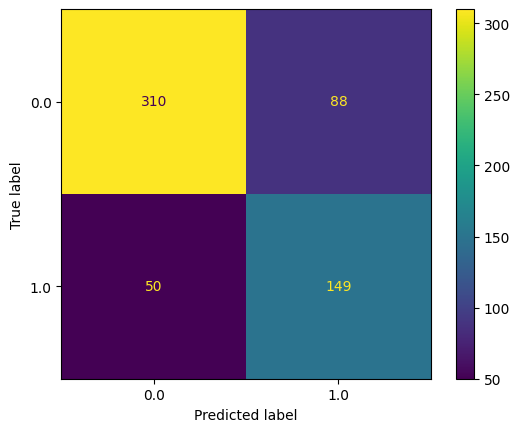

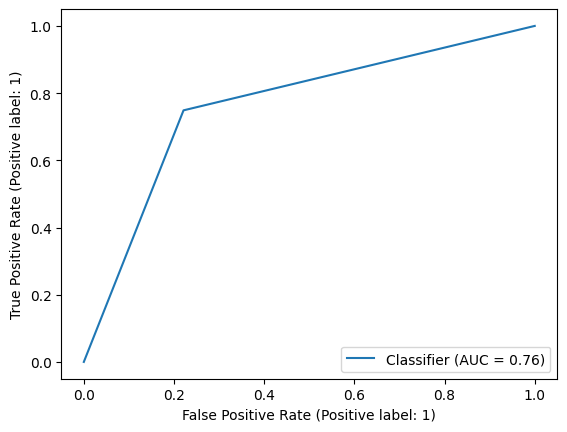

In [ ]:
# Addestra il modello con GridSearchCV
grid_search_cv.fit(X_train_bal, Y_train_bal)

# Trova i migliori parametri e il miglior score
best_params = grid_search_cv.best_params_
best_score = grid_search_cv.best_score_

# Addestra il modello con i migliori parametri trovati
best_rf = RandomForestClassifier(**best_params, random_state=42,max_depth=7,min_samples_leaf=10,criterion='gini')
best_rf.fit(X_train_bal, Y_train_bal)

# Esegui le previsioni sul test set
Y_pred = best_rf.predict(X_test_bal)

# Stampa confusion matrix
cm=confusion_matrix(Y_test_bal, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

print("Recall:", recall_score(Y_test_bal, Y_pred))
print("Accuracy: ", accuracy_score(Y_test_bal, Y_pred))


RocCurveDisplay.from_predictions(Y_test_bal, Y_pred)
plt.show()

In [ ]:
best_params

{'class_weight': 'balanced_subsample', 'max_samples': 100, 'n_estimators': 100}

Accuracy:  0.7755443886097152


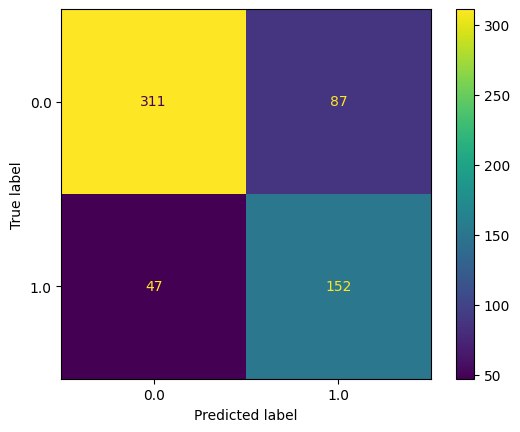

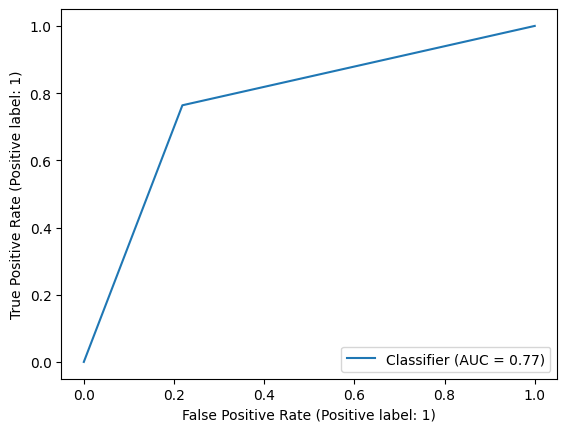

In [ ]:
rf = RandomForestClassifier(**best_params,random_state=42,max_depth=7,min_samples_leaf=10,criterion='gini')
dizionario = cross_validate(rf, X_train_bal, Y_train_bal, cv=cv, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bal)

print("Accuracy: ", accuracy_score(Y_test_bal, Y_pred))

cm=confusion_matrix(Y_test_bal, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

RocCurveDisplay.from_predictions(Y_test_bal, Y_pred)
plt.show()


Accuracy:  0.7638190954773869


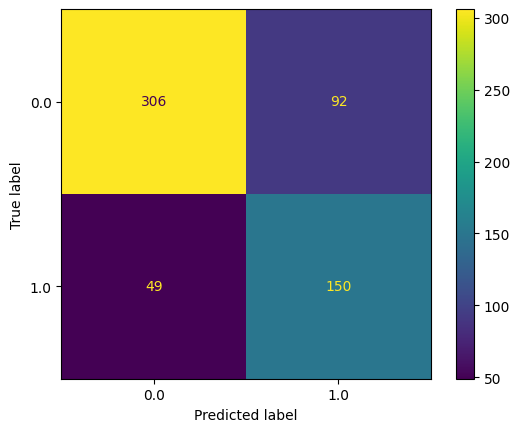

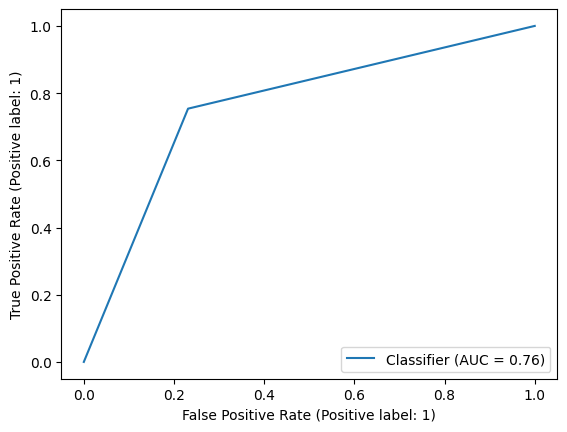

In [ ]:
rf = RandomForestClassifier(**best_params,random_state=42,max_depth=7,min_samples_leaf=10,criterion='gini')
over = SMOTE(sampling_strategy='auto', random_state=42)
under = RandomUnderSampler(sampling_strategy='auto', random_state=42)
steps = [('o', over), ('u', under), ('model', rf)]
pipeline = Pipeline(steps=steps)


dizionario = cross_validate(pipeline, X_train_bal, Y_train_bal, cv=5, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bal)

print("Accuracy: ", accuracy_score(Y_test_bal, Y_pred))

cm=confusion_matrix(Y_test_bal, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

RocCurveDisplay.from_predictions(Y_test_bal, Y_pred)
plt.show()


# Hist Gradient Boosting

In [ ]:
params = {
      #"n_estimators" : [5,10,50,100],
      "warm_start":[True,False],
      'min_samples_leaf': [10,15,20],
      "max_depth" : [4,5],
      # "max_depth":[3,4,5,6,7],
      #
      #'criterion': ['friedman_mse', 'squared_error'],
      'class_weight':['balanced'],
  }

boosting=HistGradientBoostingClassifier(random_state=42)
  # Create and fit the GridSearchCV
grid_search_cv = GridSearchCV(
      estimator=boosting,
      param_grid=params,
      cv=5,
      verbose=1,
      scoring="f1_weighted",
      return_train_score=True,
      n_jobs=-1
)

## Analisi bassa dipendenza

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Recall: 0.2962962962962963
Accuracy:  0.8324958123953099


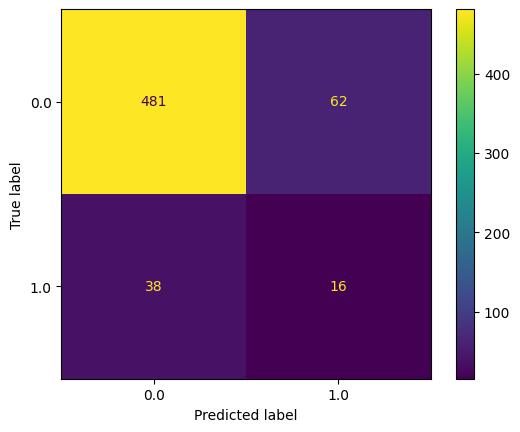

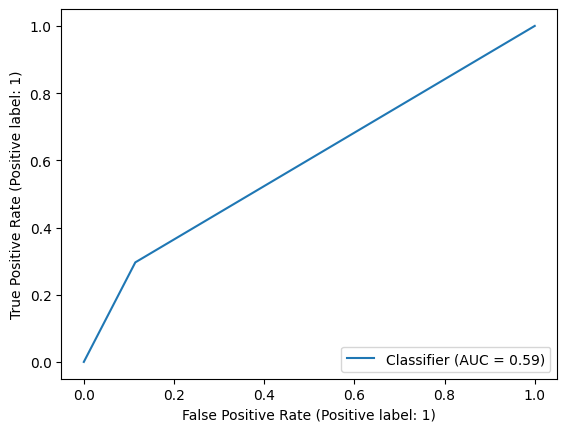

In [ ]:
# Addestra il modello con GridSearchCV
grid_search_cv.fit(X_train_bd, Y_train_bd)

# Trova i migliori parametri e il miglior score
best_params = grid_search_cv.best_params_
best_score = grid_search_cv.best_score_

# Addestra il modello con i migliori parametri trovati
best_rf = HistGradientBoostingClassifier(**best_params, random_state=42)
best_rf.fit(X_train_bd, Y_train_bd)

# Esegui le previsioni sul test set
Y_pred = best_rf.predict(X_test_bd)

# Stampa confusion matrix
cm=confusion_matrix(Y_test_bd, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

print("Recall:", recall_score(Y_test_bd, Y_pred))
print("Accuracy: ", accuracy_score(Y_test_bd, Y_pred))

RocCurveDisplay.from_predictions(Y_test_bd, Y_pred)
plt.show()

In [ ]:
best_params

{'class_weight': 'balanced',
 'max_depth': 5,
 'min_samples_leaf': 10,
 'warm_start': True}

Accuracy:  0.8324958123953099


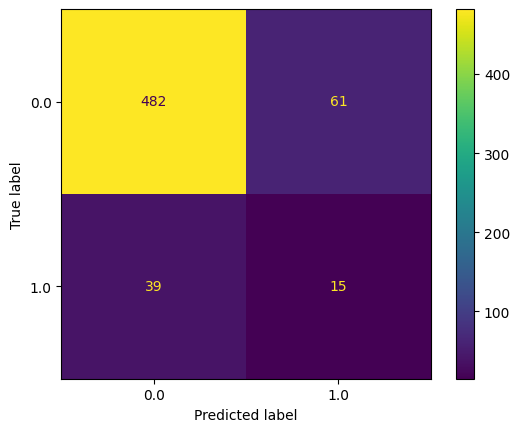

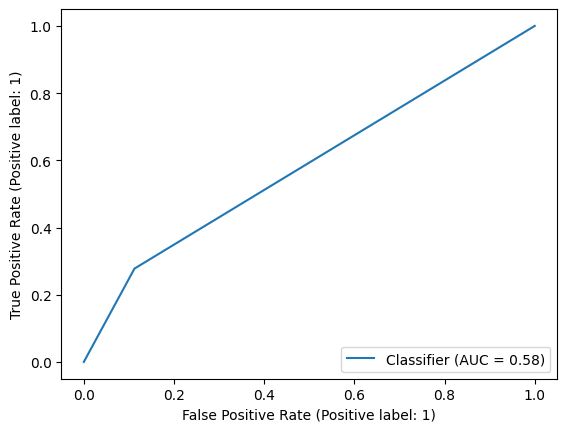

In [ ]:
gb = HistGradientBoostingClassifier(**best_params,random_state=42)

dizionario = cross_validate(gb, X_train_bd, Y_train_bd, cv=cv, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bd)

print("Accuracy: ", accuracy_score(Y_test_bd, Y_pred))

cm=confusion_matrix(Y_test_bd, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

RocCurveDisplay.from_predictions(Y_test_bd, Y_pred)
plt.show()

Accuracy:  0.8726968174204355


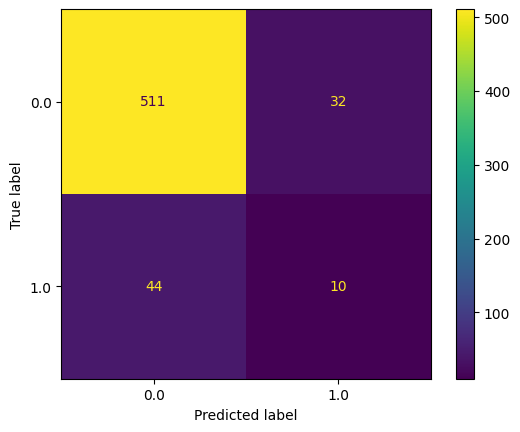

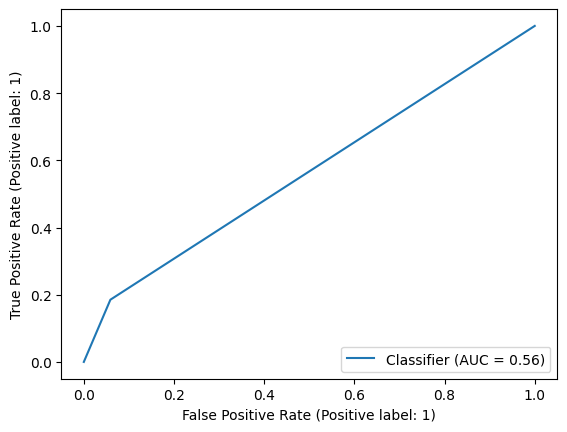

In [ ]:
rf = HistGradientBoostingClassifier(**best_params,random_state=42)
over = SMOTE(sampling_strategy='auto', random_state=42)
under = RandomUnderSampler(sampling_strategy='auto', random_state=42)
steps = [('o', over), ('u', under), ('model', rf)]
pipeline = Pipeline(steps=steps)

dizionario = cross_validate(pipeline, X_train_bd, Y_train_bd, cv=5, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bd)

print("Accuracy: ", accuracy_score(Y_test_bd, Y_pred))

cm=confusion_matrix(Y_test_bd, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

RocCurveDisplay.from_predictions(Y_test_bd, Y_pred)
plt.show()


## Analisi dipendenza bilanciata

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Recall: 0.24120603015075376
Accuracy:  0.6750418760469011


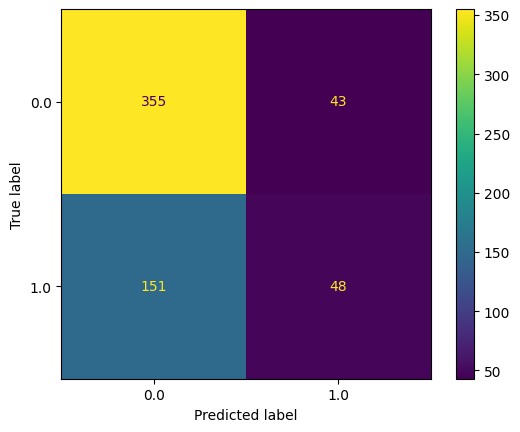

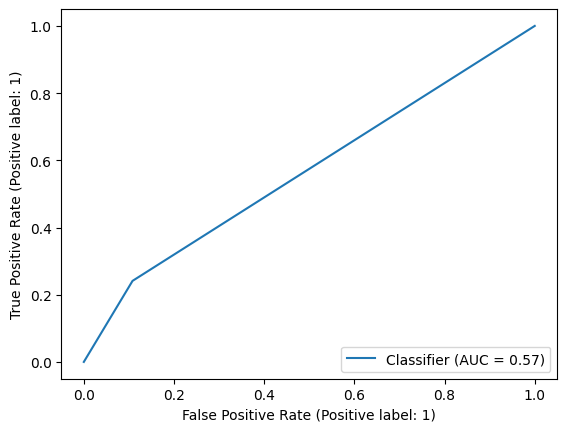

In [ ]:
# Addestra il modello con GridSearchCV
grid_search_cv.fit(X_train_bal, Y_train_bal)

# Trova i migliori parametri e il miglior score
best_params = grid_search_cv.best_params_
best_score = grid_search_cv.best_score_

# Addestra il modello con i migliori parametri trovati
best_rf = HistGradientBoostingClassifier(**best_params, random_state=42)
best_rf.fit(X_train_bal, Y_train_bd)

# Esegui le previsioni sul test set
Y_pred = best_rf.predict(X_test_bal)

# Stampa confusion matrix
cm=confusion_matrix(Y_test_bal, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

print("Recall:", recall_score(Y_test_bal, Y_pred))
print("Accuracy: ", accuracy_score(Y_test_bal, Y_pred))


RocCurveDisplay.from_predictions(Y_test_bal, Y_pred)
plt.show()

In [ ]:
best_params

{'class_weight': 'balanced',
 'max_depth': 4,
 'min_samples_leaf': 10,
 'warm_start': True}

Accuracy:  0.7654941373534339


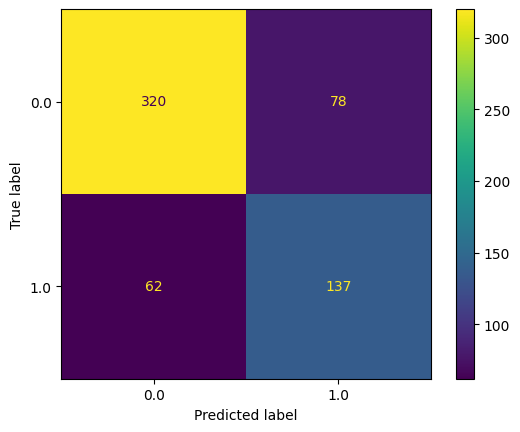

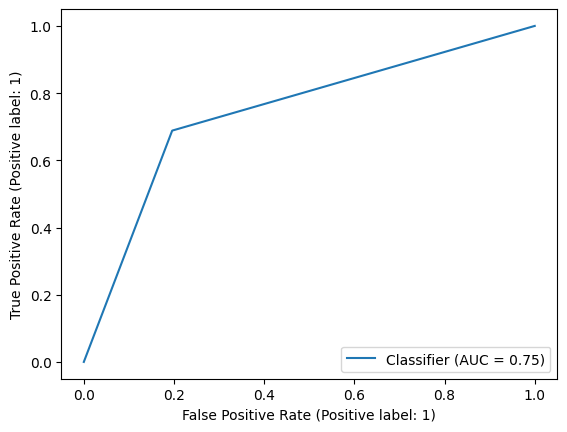

In [ ]:
rf = HistGradientBoostingClassifier(**best_params,random_state=42)
dizionario = cross_validate(rf, X_train_bal, Y_train_bal, cv=cv, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bal)

print("Accuracy: ", accuracy_score(Y_test_bal, Y_pred))

cm=confusion_matrix(Y_test_bal, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

RocCurveDisplay.from_predictions(Y_test_bal, Y_pred)
plt.show()

Accuracy:  0.7671691792294807


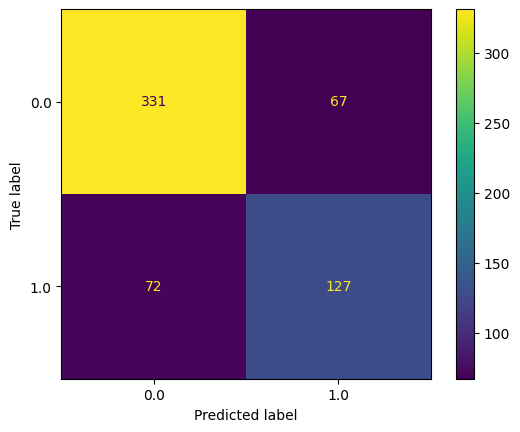

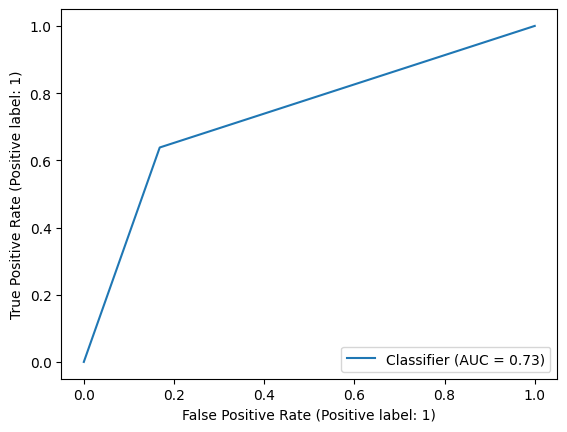

In [ ]:
rf = HistGradientBoostingClassifier(**best_params,random_state=42)
over = SMOTE(sampling_strategy='auto', random_state=42)
under = RandomUnderSampler(sampling_strategy='auto', random_state=42)
steps = [('o', over), ('u', under), ('model', rf)]
pipeline = Pipeline(steps=steps)

dizionario = cross_validate(pipeline, X_train_bal, Y_train_bal, cv=5, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bal)

print("Accuracy: ", accuracy_score(Y_test_bal, Y_pred))

cm=confusion_matrix(Y_test_bal, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

RocCurveDisplay.from_predictions(Y_test_bal, Y_pred)
plt.show()

#Naive Bayes

## Analisi bassa dipendenza

Accuracy:  0.8408710217755444


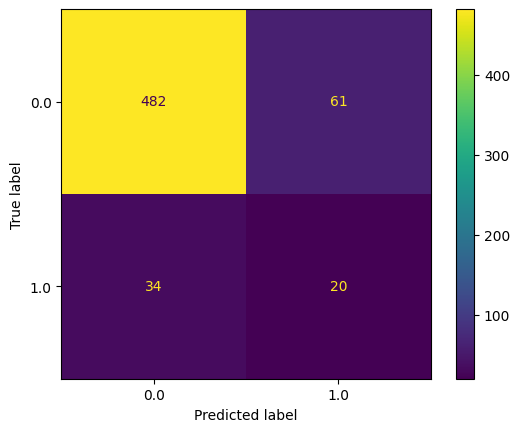

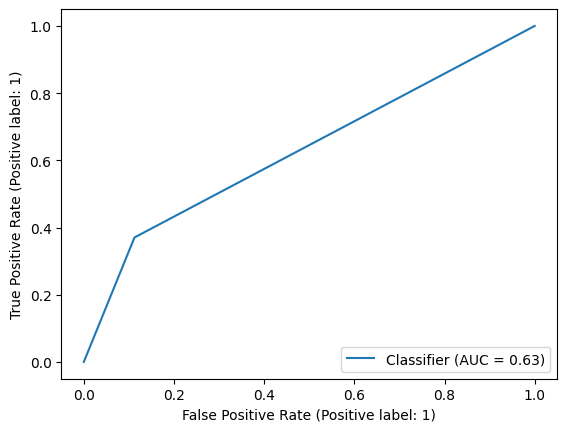

In [ ]:
gb = GaussianNB()

dizionario = cross_validate(gb, X_train_bd, Y_train_bd, cv=cv, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bd)

print("Accuracy: ", accuracy_score(Y_test_bd, Y_pred))

cm=confusion_matrix(Y_test_bd, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0.0','1.0']).plot()

RocCurveDisplay.from_predictions(Y_test_bd, Y_pred)
plt.show()

Accuracy:  0.7185929648241206


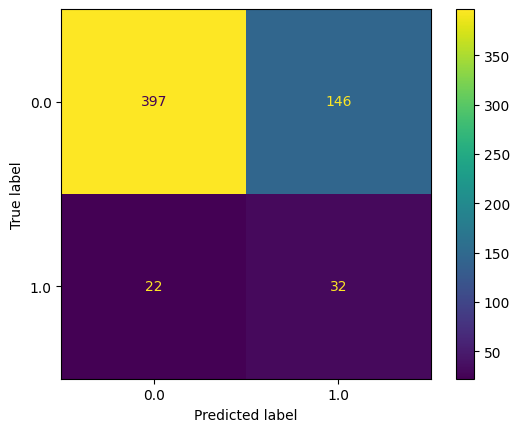

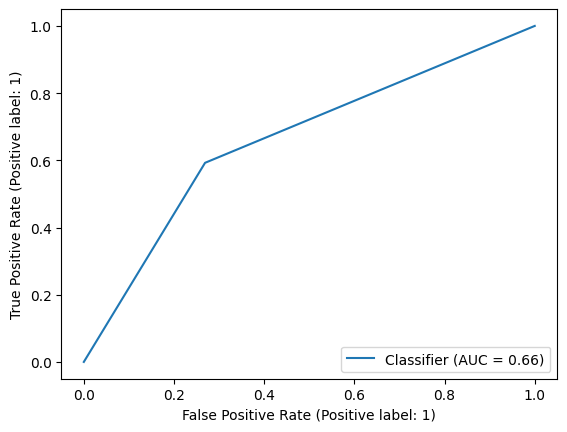

In [ ]:
rf = GaussianNB()
over = SMOTE(sampling_strategy='auto', random_state=42)
under = RandomUnderSampler(sampling_strategy='auto')
steps = [('o', over), ('u', under), ('model', rf)]
pipeline = Pipeline(steps=steps)


dizionario = cross_validate(pipeline, X_train_bd, Y_train_bd, cv=5, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bd)

print("Accuracy: ", accuracy_score(Y_test_bd, Y_pred))

cm=confusion_matrix(Y_test_bd, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0.0','1.0']).plot()

RocCurveDisplay.from_predictions(Y_test_bd, Y_pred)
plt.show()

## Analisi dipendenza bilanciata

Accuracy:  0.7671691792294807


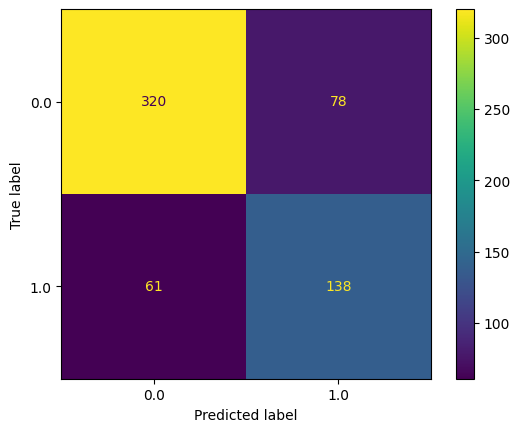

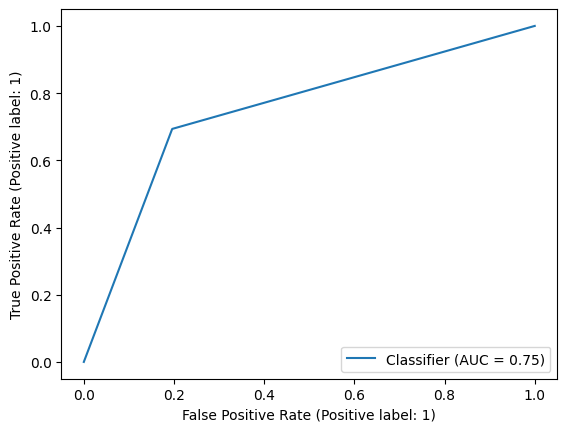

In [ ]:
gb = GaussianNB()

dizionario = cross_validate(gb, X_train_bal, Y_train_bal, cv=cv, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bal)

print("Accuracy: ", accuracy_score(Y_test_bal, Y_pred))

cm=confusion_matrix(Y_test_bal, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0.0','1.0']).plot()

RocCurveDisplay.from_predictions(Y_test_bal, Y_pred)
plt.show()

Accuracy:  0.7654941373534339


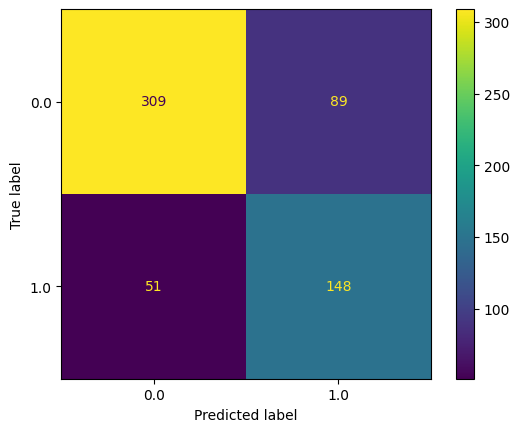

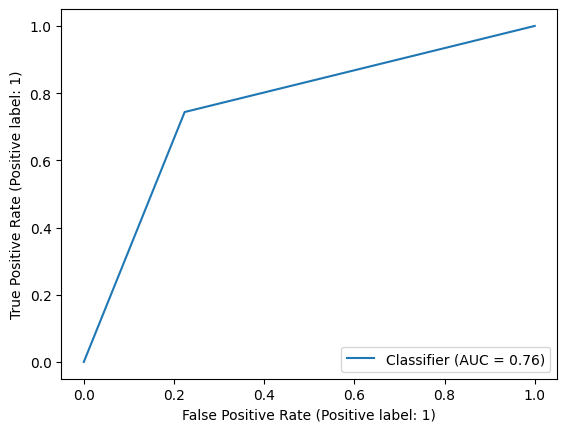

In [ ]:
rf = GaussianNB()
over = SMOTE(sampling_strategy='auto', random_state=42)
under = RandomUnderSampler(sampling_strategy='auto')
steps = [('o', over), ('u', under), ('model', rf)]
pipeline = Pipeline(steps=steps)


dizionario = cross_validate(pipeline, X_train_bal, Y_train_bal, cv=5, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bal)

print("Accuracy: ", accuracy_score(Y_test_bal, Y_pred))

cm=confusion_matrix(Y_test_bal, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0.0','1.0']).plot()

RocCurveDisplay.from_predictions(Y_test_bal, Y_pred)
plt.show()

#  k-nearest neighbors Classifier

In [ ]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [1,3,5,7],     # Valori di n_neighbors da provare
    'weights': ['uniform', 'distance'],   # Metodi di pesatura
    'p': [1, 2,3,4,5],   # Ordine della distanza (1 = Manhattan, 2 = Euclidea)
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

grid_search_cv = GridSearchCV(
      estimator=knn,
      param_grid=param_grid,
      cv=5,
      verbose=1,
      scoring="f1_weighted",
      return_train_score=True,
      n_jobs=-1
  )

##Analisi bassa dipendenza

In [ ]:
grid_search_cv.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'p': 4, 'weights': 'uniform'}

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Accuratezza: 0.8827470686767169


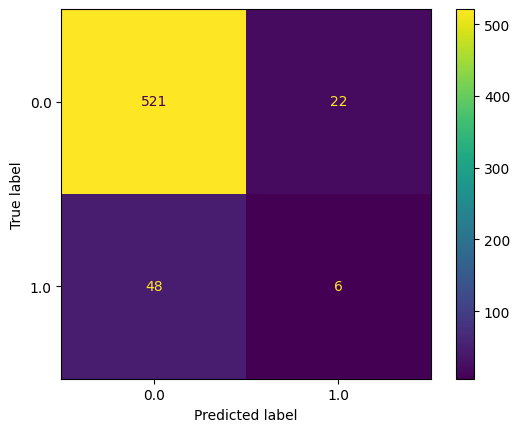

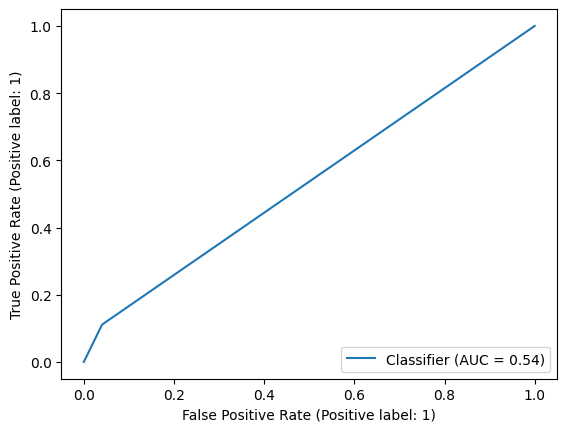

In [ ]:
grid_search_cv.fit(X_train_bd, Y_train_bd)
best_knn = grid_search_cv.best_estimator_
y_pred = best_knn.predict(X_test_bd)

# Calcola l'accuratezza del modello
accuracy = accuracy_score(Y_test_bd, y_pred)
print("Accuratezza:", accuracy)

cm=confusion_matrix(Y_test_bd, y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

RocCurveDisplay.from_predictions(Y_test_bd, y_pred)
plt.show()

Accuracy:  0.8894472361809045


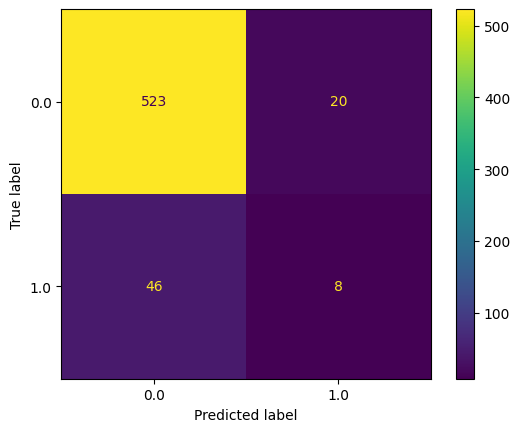

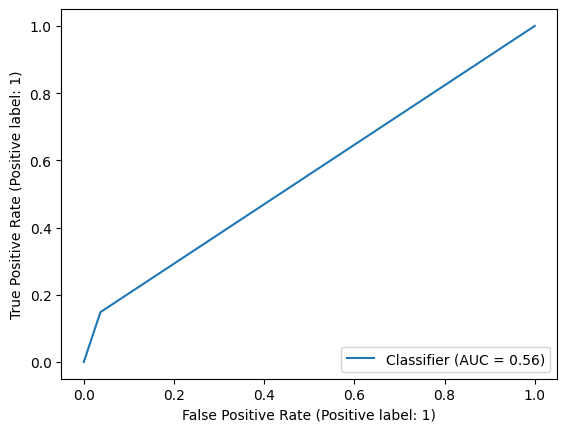

In [ ]:
best_knn = grid_search_cv.best_estimator_

dizionario = cross_validate(best_knn, X_train_bd, Y_train_bd, cv=cv, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bd)

print("Accuracy: ", accuracy_score(Y_test_bd, Y_pred))

cm=confusion_matrix(Y_test_bd, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

RocCurveDisplay.from_predictions(Y_test_bd, Y_pred)
plt.show()

Accuracy:  0.7386934673366834


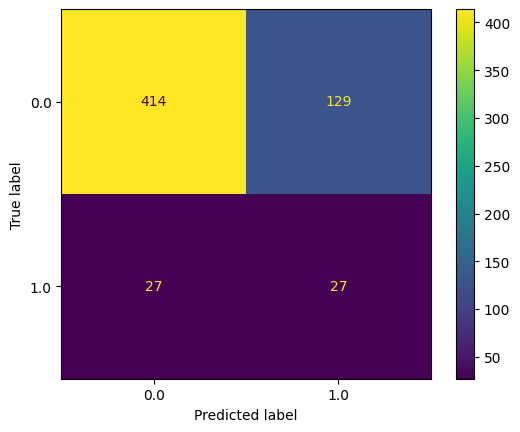

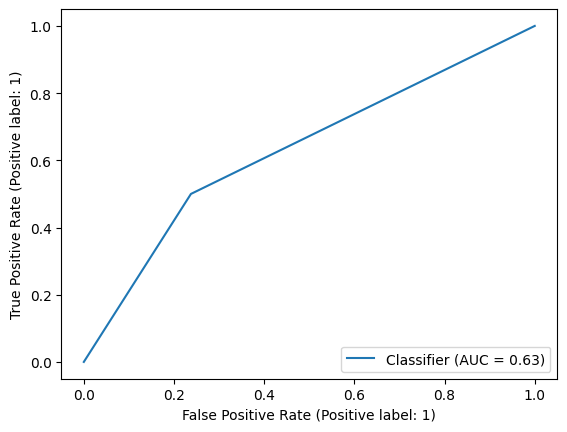

In [ ]:
best_knn = grid_search_cv.best_estimator_
over = SMOTE(sampling_strategy='auto', random_state=42)
under = RandomUnderSampler(sampling_strategy='auto', random_state=42)
steps = [('o', over), ('u', under), ('model', best_knn)]
pipeline = Pipeline(steps=steps)


dizionario = cross_validate(pipeline, X_train_bd, Y_train_bd, cv=5, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bd)

print("Accuracy: ", accuracy_score(Y_test_bd, Y_pred))

cm=confusion_matrix(Y_test_bd, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

RocCurveDisplay.from_predictions(Y_test_bd, Y_pred)
plt.show()


##Analisi dipendenza bilanciata

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Accuratezza: 0.7604690117252931


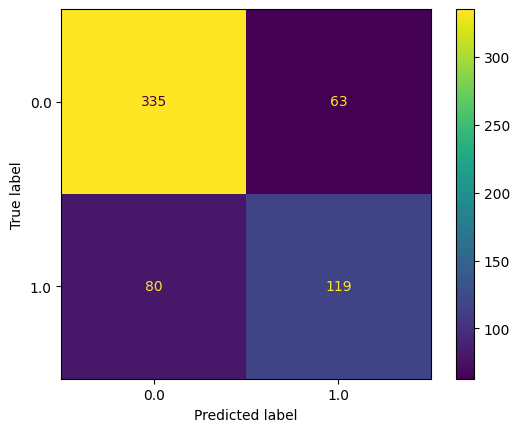

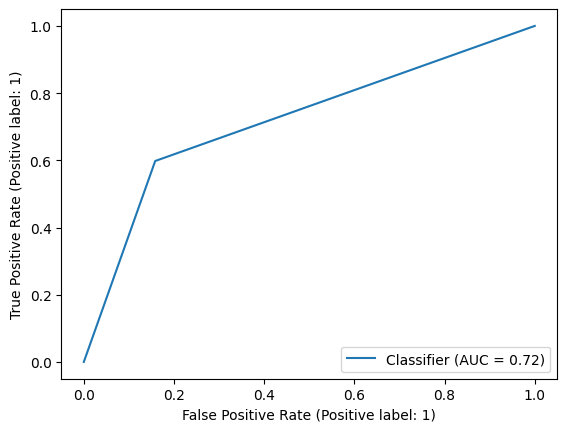

In [ ]:
grid_search_cv.fit(X_train_bal, Y_train_bal)
best_knn = grid_search_cv.best_estimator_
y_pred = best_knn.predict(X_test_bal)

# Calcola l'accuratezza del modello
accuracy = accuracy_score(Y_test_bal, y_pred)
print("Accuratezza:", accuracy)

cm=confusion_matrix(Y_test_bal, y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

RocCurveDisplay.from_predictions(Y_test_bal, y_pred)
plt.show()

In [ ]:
grid_search_cv.best_params_

{'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

Accuracy:  0.7671691792294807


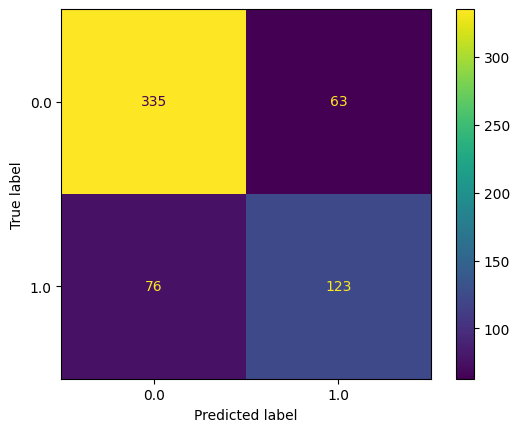

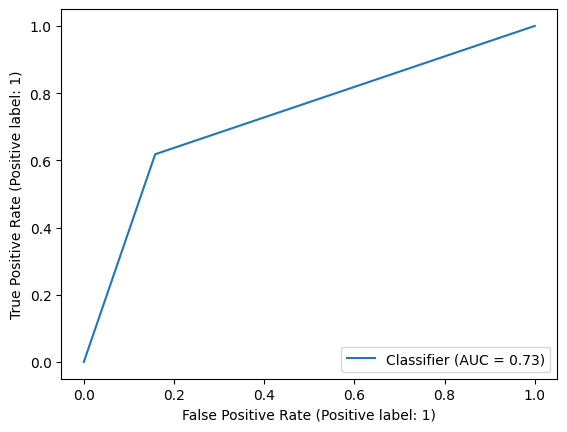

In [ ]:
best_knn = grid_search_cv.best_estimator_

dizionario = cross_validate(best_knn, X_train_bal, Y_train_bal, cv=cv, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bal)

print("Accuracy: ", accuracy_score(Y_test_bal, Y_pred))

cm=confusion_matrix(Y_test_bal, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

RocCurveDisplay.from_predictions(Y_test_bal, Y_pred)
plt.show()

Accuracy:  0.7504187604690117


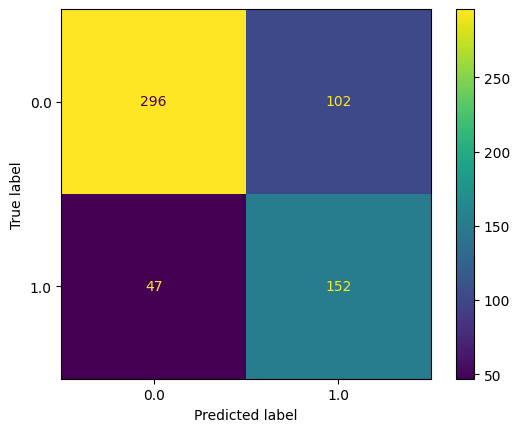

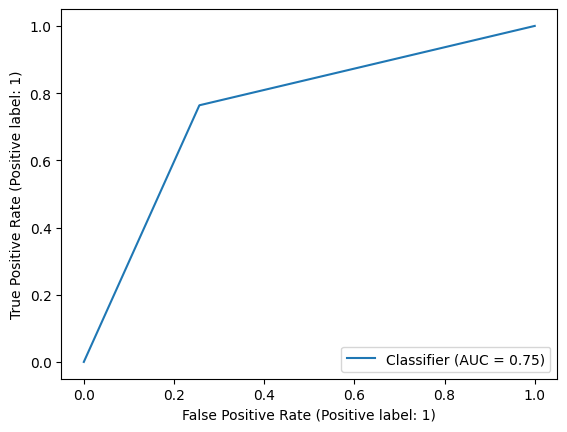

In [ ]:
best_knn = grid_search_cv.best_estimator_
over = SMOTE(sampling_strategy='auto', random_state=42)
under = RandomUnderSampler(sampling_strategy='auto', random_state=42)
steps = [('o', over), ('u', under), ('model', best_knn)]
pipeline = Pipeline(steps=steps)


dizionario = cross_validate(pipeline, X_train_bal, Y_train_bal, cv=5, n_jobs=-1, scoring='f1_weighted', return_estimator=True)

Y_pred = dizionario['estimator'][0].predict(X_test_bal)

print("Accuracy: ", accuracy_score(Y_test_bal, Y_pred))

cm=confusion_matrix(Y_test_bal, Y_pred)
# Print confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search_cv.classes_).plot()

RocCurveDisplay.from_predictions(Y_test_bal, Y_pred)
plt.show()

# K-means clustering

Dal grafico sotto notiamo che effettivamnete i punti nello spazio sono disposti a caso sia per dipendenza che non, non c'è affinità non ha senso fare ipotesi di clustering..

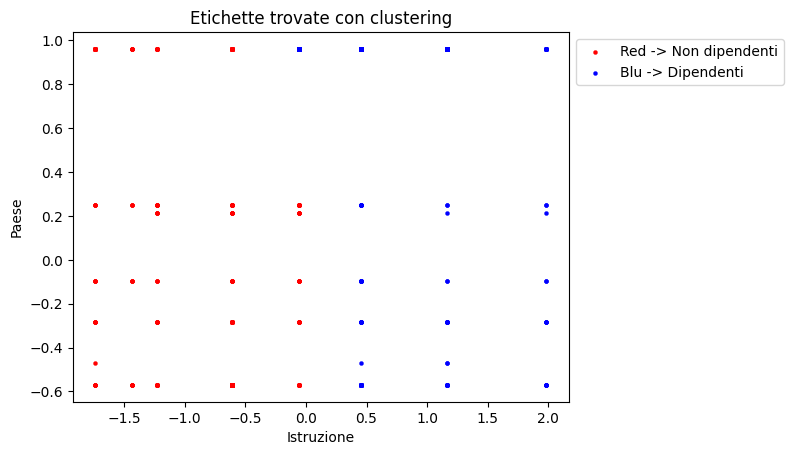

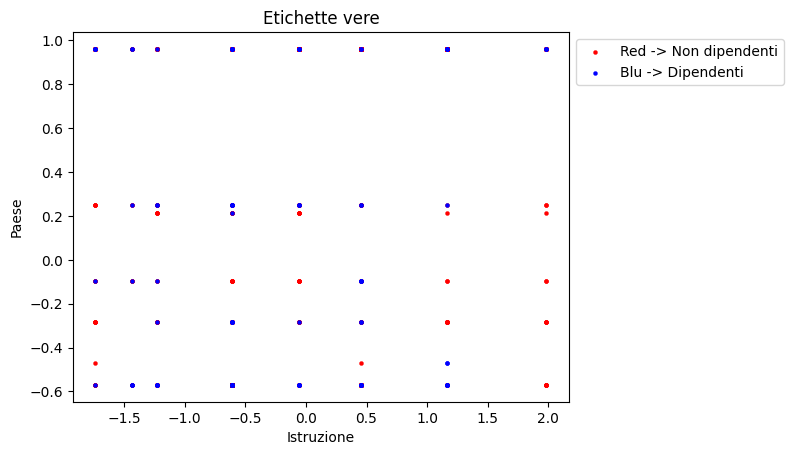

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# Prendo solo queste due feature le più importanti, risultati ottenuti da random forest guardando la feature importance
datasetKMeans=dataset[['Istruzione','Paese']]

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(datasetKMeans)

dipendenza=pd.DataFrame({'Benzos':kmeans.labels_})

true_label=dataset[['Benzos']].to_numpy()

# conto quante etichette il k-means ha etichettato correttamente
np.count_nonzero(dipendenza==true_label)

datasetKMeans=np.append(datasetKMeans, dipendenza, axis=1)
df = pd.DataFrame(datasetKMeans, columns = ['Istruzione','Paese','Dipendenza'])

#filter rows of original data
nonDipendenti = df.loc[df['Dipendenza'] == 0]
dipendenti = df.loc[df['Dipendenza'] == 1]

# filter true label
true_nonDipendenti = dataset.loc[dataset['Benzos'] == 0]
true_dipendenti = dataset.loc[dataset['Benzos'] == 1]

#Plotting the clustering result
plt.figure()
plt.scatter(nonDipendenti['Istruzione'], nonDipendenti['Paese'], color='red',marker='.',linewidths=0.2)
plt.scatter(dipendenti['Istruzione'], dipendenti['Paese'], color='blue',marker='.',linewidths=0.2)
plt.title('Etichette trovate con clustering')
plt.xlabel('Istruzione')
plt.ylabel('Paese')
plt.legend(['Red -> Non dipendenti', 'Blu -> Dipendenti'],loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#Plotting the true result.
plt.figure()
plt.scatter(true_nonDipendenti['Istruzione'], true_nonDipendenti['Paese'], color='red',marker='.',linewidths=0.2)
plt.scatter(true_dipendenti['Istruzione'], true_dipendenti['Paese'], color='blue',marker='.',linewidths=0.2)
plt.title('Etichette vere')
plt.xlabel('Istruzione')
plt.ylabel('Paese')
plt.legend(['Red -> Non dipendenti', 'Blu -> Dipendenti'],loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



L'utilizzo di K-means ci permette di etichettare in modo corretto 722/1755 elementi vale a dire il 41%, risultato ottenuto utilizzando solamente due feature *Istruzione, Paese*.

Tuttavia i risultati ottenuti non sono soddisfacenti, poichè come da grafico di etichette vere le classi "Dipendenza" e "non dipendenza" si suddividiono in modo casuale e quindi l'idea di applicare un clustering prima della classificazione viene meno. Infatti le etichette trovate tramite k-means sono per il 41% corrette ma i due cluster trovati non sono significativi.